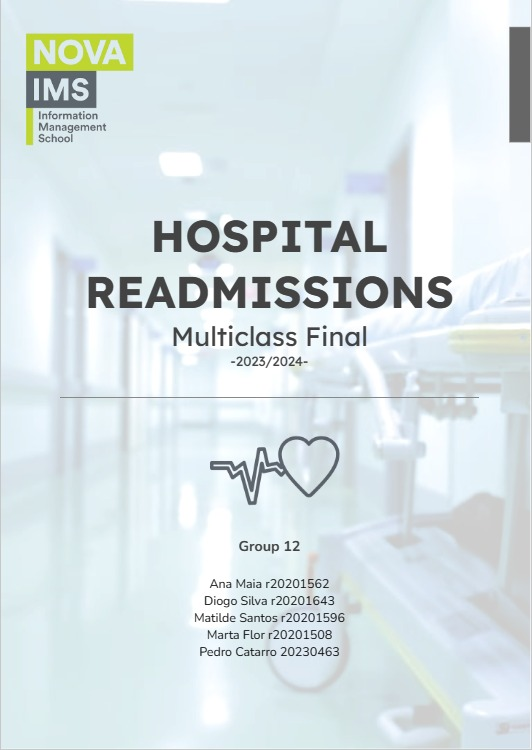

## Index

1. [Data Exploration](#section1) <br>
    1.1 [Metric Features Distributions](#section1.1) <br>
    1.2 [Non-Metric Features Plots](#section1.2) <br>
    1.3 [Data Visualisation](#section1.3) <br>
2. [Data Pre-Processing](#section2) <br>
    2.1 [Incoherence Checking](#section2.1) <br>
    2.2 [Split the dataset (Train and Validation)](#section2.2) <br>
    2.3 [Treating Outliers](#section2.3) <br>
    2.4 [Missing Values](#section2.4) <br>
    2.5 [Feature Engenniring](#section2.5) <br>
        2.5.1 [Convert Variables to Dummy](#section2.5.1) <br>
        2.5.2.[Variables Transformations](#section2.5.2) <br>
    2.6 [Scalling](#section2.6) <br>
    2.7 [Missing Values Treatment](#section2.7) <br>
        2.7.1 [Missing Value Imputation - Train](#section2.7.1) <br>
        2.7.2 [Missing Value Imputation - Validation](#section2.7.2) <br>
    2.8 [Balance Dataset](#section2.8) <br>
3. [Feature Selection](#section3) <br>
    3.1 [Filter Methods](#section3.1) <br>
    3.2 [Wrapper Methods](#section3.2) <br>
    3.3 [Embedded Methods](#section3.3) <br>
    3.4 [Final Selection](#section3.4) <br>
4. [Modelling](#section4)<br>
    4.1 [Logistic Regression](#section4.1)<br>
    4.2 [Complement Naive Bayes](#section4.2)<br>
    4.3 [KNN](#section4.3)<br>
    4.4 [Multi-Layer Perceptron](#section4.4)<br>
    4.5 [Decision Trees](#section4.5)<br>
    4.6 [Random Forest](#section4.6)<br>
    4.7 [Support Vector Classifier](#section4.7)<br>
    4.8 [Gradient Boosting](#section4.8)<br>
5. [Test](#section5)<br>

## 1. **Data Exploration** <a class="anchor" id="section1">

In [ ]:
# !pip install --upgrade pandas

In [ ]:
# Import Libraries
!pip install prettytable
!pip install category_encoders
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LassoCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import time
from sklearn.model_selection import StratifiedKFold
from sklearn.impute import KNNImputer
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score
from prettytable import PrettyTable

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_original = pd.read_csv('train.csv')

In [ ]:
data = df_original.copy()

In [ ]:
data.head(10)

,encounter_id,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
0,533253,USA,70110,Caucasian,Female,[70-80),?,?,0,0,...,276,466,8,NaN,NaN,No,No,[],No,>30 days
1,426224,USA,29775006,AfricanAmerican,Male,[50-60),?,?,0,0,...,785,162,9,NaN,NaN,No,Yes,['insulin'],No,No
2,634063,USA,80729253,Caucasian,Female,[60-70),?,?,0,0,...,135,250,6,NaN,NaN,Ch,Yes,"['glimepiride', 'insulin']",No,No
3,890610,USA,2919042,AfricanAmerican,Male,[60-70),?,MC,0,0,...,562,455,5,NaN,NaN,No,No,[],No,No
4,654194,USA,84871971,Caucasian,Female,[70-80),?,HM,1,0,...,599,428,9,NaN,NaN,No,No,[],No,>30 days
5,269878,USA,279288,Caucasian,Female,[50-60),?,?,0,0,...,250,244,3,NaN,Norm,No,No,[],No,>30 days
6,182051,USA,1566405,Caucasian,Female,[50-60),?,UN,0,0,...,250.02,493,9,NaN,>8,Ch,Yes,"['metformin', 'glimepiride']",No,No
7,964239,USA,60052095,Other,Male,[70-80),?,MC,0,0,...,287,276,9,NaN,NaN,Ch,Yes,"['nateglinide', 'glipizide', 'insulin']",No,No
8,418598,USA,85756257,Caucasian,Female,[50-60),?,MC,1,0,...,250.02,276,9,NaN,NaN,No,Yes,['insulin'],No,No
9,760130,USA,96104214,Caucasian,Female,[70-80),?,MC,0,0,...,398,745,9,NaN,NaN,No,Yes,['insulin'],No,>30 days


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71236 entries, 0 to 71235
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   encounter_id                           71236 non-null  int64 
 1   country                                71236 non-null  object
 2   patient_id                             71236 non-null  int64 
 3   race                                   67682 non-null  object
 4   gender                                 71236 non-null  object
 5   age                                    67679 non-null  object
 6   weight                                 71236 non-null  object
 7   payer_code                             71236 non-null  object
 8   outpatient_visits_in_previous_year     71236 non-null  int64 
 9   emergency_visits_in_previous_year      71236 non-null  int64 
 10  inpatient_visits_in_previous_year      71236 non-null  int64 
 11  admission_type 

In [ ]:
# Check the unique values for each column
unique_values_per_column = {}

for column in data.columns:
    unique_values = pd.unique(data[column])
    unique_values_per_column[column] = unique_values

# Print the unique values for each column
for column, unique_values in unique_values_per_column.items():
    print(f"Column '{column}':")
    print(unique_values)
    print("\n")

Column 'encounter_id':
[533253 426224 634063 ... 332030 757560 459757]


Column 'country':
['USA']


Column 'patient_id':
[   70110 29775006 80729253 ... 65777877 24531381  4663818]


Column 'race':
['Caucasian' 'AfricanAmerican' 'Other' nan 'Hispanic' 'Asian' '?']


Column 'gender':
['Female' 'Male' 'Unknown/Invalid']


Column 'age':
['[70-80)' '[50-60)' '[60-70)' '[80-90)' nan '[40-50)' '[20-30)' '[30-40)'
 '[90-100)' '[10-20)' '[0-10)']


Column 'weight':
['?' '[50-75)' '[100-125)' '[75-100)' '[125-150)' '[25-50)' '>200'
 '[0-25)' '[150-175)' '[175-200)']


Column 'payer_code':
['?' 'MC' 'HM' 'UN' 'SP' 'SI' 'CM' 'DM' 'CP' 'MD' 'OG' 'BC' 'PO' 'WC' 'OT'
 'MP' 'CH' 'FR']


Column 'outpatient_visits_in_previous_year':
[ 0  1  2  6  5  3  4  9 36 11  7 16  8 10 12 15 13 20 27 14 35 22 24 21
 17 38 18 37 23 19 25 29 26 42 33 39 34 28]


Column 'emergency_visits_in_previous_year':
[ 0  1  6  2  5  4  9  3 10  7 11 12 13 22  8 14 19 25 20 37 29 28 18 16
 15 21 24 42 76 63]


Column 'inpatie

['[]' "['insulin']" "['glimepiride', 'insulin']"
 "['metformin', 'glimepiride']" "['nateglinide', 'glipizide', 'insulin']"
 "['metformin', 'glyburide', 'rosiglitazone', 'insulin']"
 "['repaglinide', 'insulin']" "['glipizide', 'insulin']"
 "['metformin', 'insulin']" "['rosiglitazone', 'insulin']" "['glipizide']"
 "['nateglinide', 'pioglitazone']" "['glyburide']"
 "['metformin', 'glipizide', 'insulin']" "['pioglitazone', 'insulin']"
 "['glimepiride', 'rosiglitazone', 'insulin']" "['glyburide', 'insulin']"
 "['metformin', 'glyburide', 'insulin']" "['metformin', 'glyburide']"
 "['glyburide', 'pioglitazone']" "['glimepiride']" "['metformin']"
 "['insulin', 'glyburide-metformin']" "['rosiglitazone']"
 "['nateglinide', 'insulin']" "['metformin', 'acarbose', 'insulin']"
 "['glipizide', 'pioglitazone']" "['glipizide', 'tolazamide', 'insulin']"
 "['metformin', 'glimepiride', 'insulin']" "['metformin', 'glipizide']"
 "['nateglinide']" "['metformin', 'rosiglitazone', 'insulin']"
 "['glyburide', 'r

In [ ]:
# Set the index to encounter_id
data.set_index('encounter_id', inplace = True)

In [ ]:
data.shape

(71236, 30)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71236 entries, 533253 to 459757
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   country                                71236 non-null  object
 1   patient_id                             71236 non-null  int64 
 2   race                                   67682 non-null  object
 3   gender                                 71236 non-null  object
 4   age                                    67679 non-null  object
 5   weight                                 71236 non-null  object
 6   payer_code                             71236 non-null  object
 7   outpatient_visits_in_previous_year     71236 non-null  int64 
 8   emergency_visits_in_previous_year      71236 non-null  int64 
 9   inpatient_visits_in_previous_year      71236 non-null  int64 
 10  admission_type                         67530 non-null  object
 11  medical_specia

In [ ]:
# Check number of unique values in each column
unique_values = data.nunique()

print("---- Unique Values")
print(unique_values)

---- Unique Values
country                                      1
patient_id                               53985
race                                         6
gender                                       3
age                                         10
weight                                      10
payer_code                                  18
outpatient_visits_in_previous_year          38
emergency_visits_in_previous_year           30
inpatient_visits_in_previous_year           21
admission_type                               7
medical_specialty                           69
average_pulse_bpm                           80
discharge_disposition                       25
admission_source                            16
length_of_stay_in_hospital                  14
number_lab_tests                           114
non_lab_procedures                           7
number_of_medications                       72
primary_diagnosis                          687
secondary_diagnosis                      

In [ ]:
# Summary Statistics for all columns, including categorical columns
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,71236,1,USA,71236,NaN,NaN,NaN,NaN,NaN,NaN,NaN
patient_id,71236.0,NaN,NaN,NaN,54302279.330984,38795850.347332,135.0,23396510.25,45305631.0,87558374.25,189502619.0
race,67682,6,Caucasian,50693,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,71236,3,Female,38228,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,67679,10,[70-80),17359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,71236,10,?,68990,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payer_code,71236,18,?,28201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
outpatient_visits_in_previous_year,71236.0,NaN,NaN,NaN,0.369588,1.287469,0.0,0.0,0.0,0.0,42.0
emergency_visits_in_previous_year,71236.0,NaN,NaN,NaN,0.196249,0.910854,0.0,0.0,0.0,0.0,76.0
inpatient_visits_in_previous_year,71236.0,NaN,NaN,NaN,0.640154,1.267271,0.0,0.0,0.0,1.0,21.0


In [ ]:
# Check whether we have an unbalanced dataset (i.e., check is the classes of the target variables are not represented equally)
data['readmitted_binary'].value_counts()/len(data) * 100

readmitted_binary
No     88.839912
Yes    11.160088
Name: count, dtype: float64

In [ ]:
data['readmitted_multiclass'].value_counts()/len(data) * 100

readmitted_multiclass
No          53.912348
>30 days    34.927565
<30 days    11.160088
Name: count, dtype: float64

In [ ]:
data.drop("readmitted_binary", axis=1, inplace=True)

In [ ]:
# Check if there are Duplicates
data[data.duplicated(keep=False)]

# There are no duplicates

,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,...,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,


In [ ]:
# Define Metric, Non-mMtric Features, and Target Features
metric_features = ["outpatient_visits_in_previous_year", "emergency_visits_in_previous_year", "inpatient_visits_in_previous_year", "average_pulse_bpm" ,"length_of_stay_in_hospital", "number_lab_tests", "non_lab_procedures", "number_of_medications", "number_diagnoses" ]

columns_to_drop = metric_features + ['readmitted_multiclass']
non_metric_features = data.drop(columns=columns_to_drop).columns.to_list()

target = ['readmitted_multiclass']

In [ ]:
non_metric_features

['country',
 'patient_id',
 'race',
 'gender',
 'age',
 'weight',
 'payer_code',
 'admission_type',
 'medical_specialty',
 'discharge_disposition',
 'admission_source',
 'primary_diagnosis',
 'secondary_diagnosis',
 'additional_diagnosis',
 'glucose_test_result',
 'a1c_test_result',
 'change_in_meds_during_hospitalization',
 'prescribed_diabetes_meds',
 'medication']

In [ ]:
metric_features

['outpatient_visits_in_previous_year',
 'emergency_visits_in_previous_year',
 'inpatient_visits_in_previous_year',
 'average_pulse_bpm',
 'length_of_stay_in_hospital',
 'number_lab_tests',
 'non_lab_procedures',
 'number_of_medications',
 'number_diagnoses']

## 1.1. **Metric Features Distributions** <a class="anchor" id="section1.1">

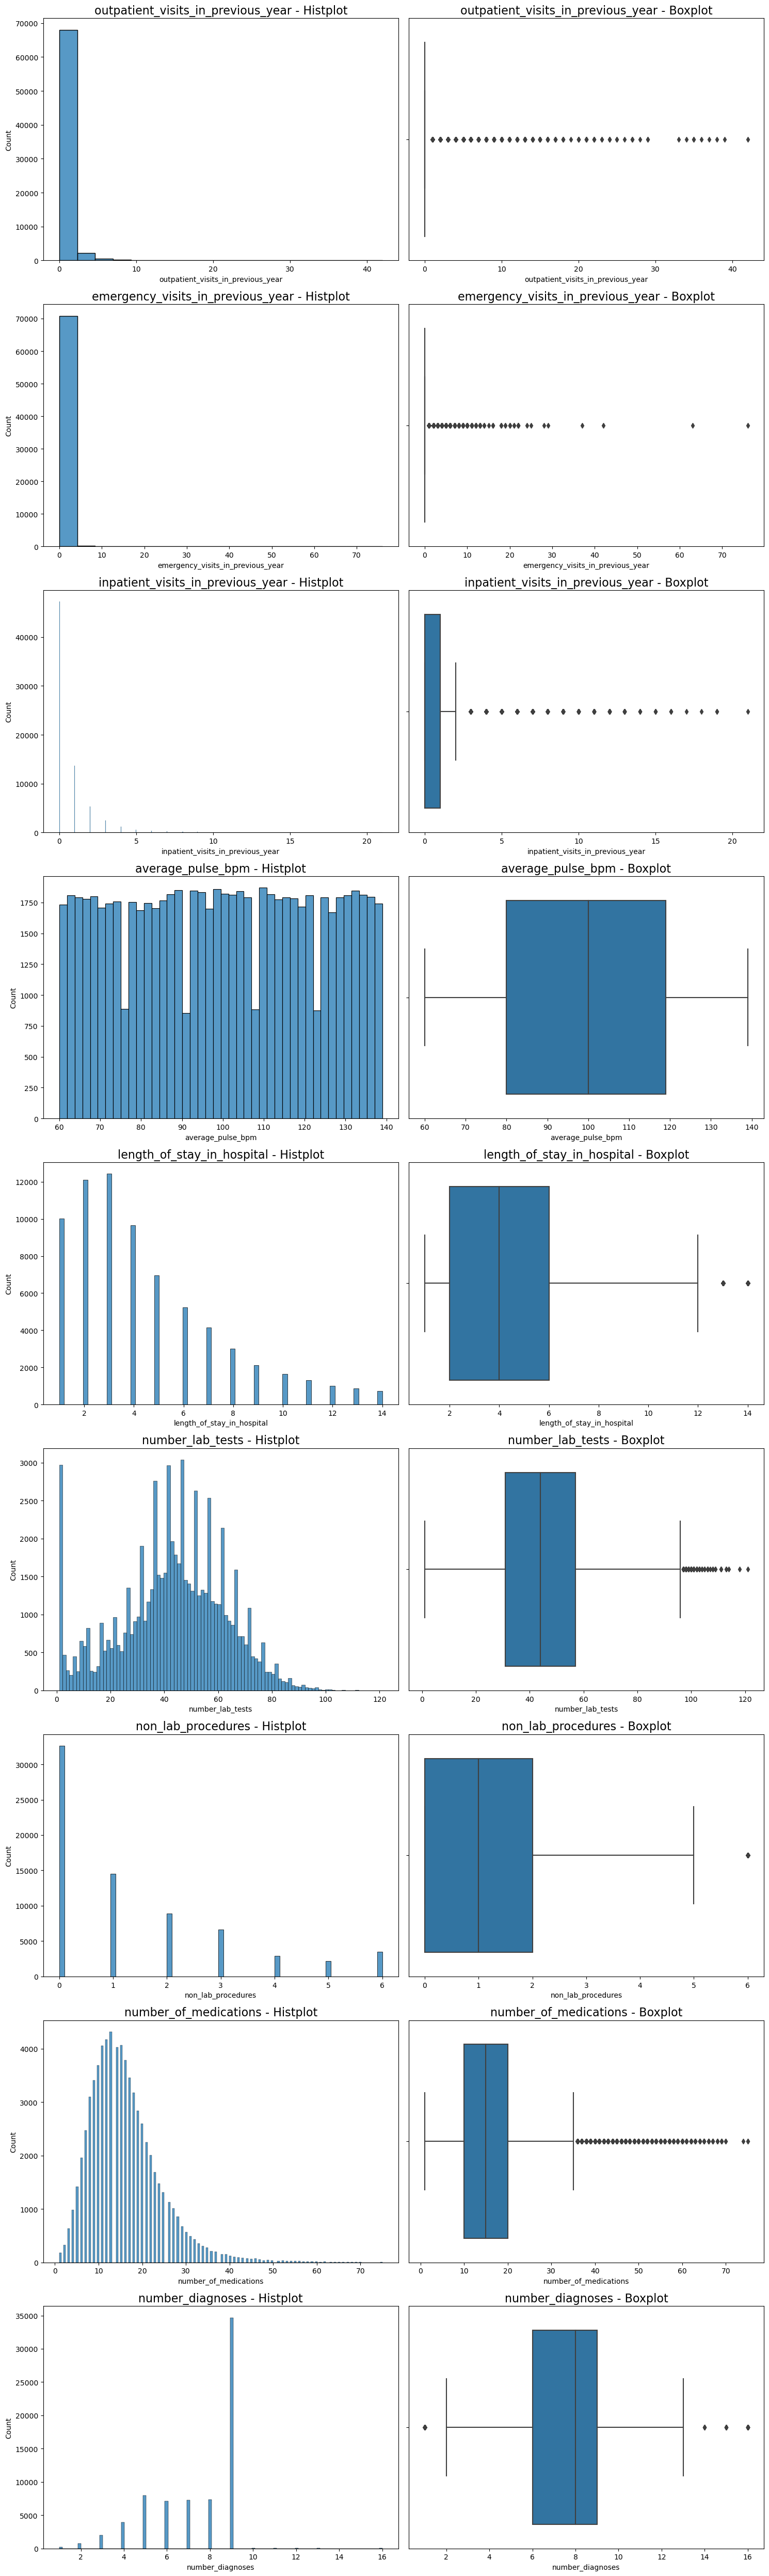

In [ ]:
# Metric Features Plots
fig, axes = plt.subplots(nrows = len(metric_features), ncols = 2,figsize=(15, 50))

for i, col in enumerate(data[metric_features]):
    ax = axes[i,0]
    sns.histplot(x=data[col], ax=ax)
    ax.set_title(f"{col} - Histplot", size=16)

for i, col in enumerate(data[metric_features]):
    ax = axes[i,1]
    sns.boxplot(x=data[col], ax=ax)
    ax.set_title(f"{col} - Boxplot", size=16)

plt.tight_layout()
plt.show()

## 1.2. **Non-Metric Features Plots** <a class="anchor" id="section1.2">

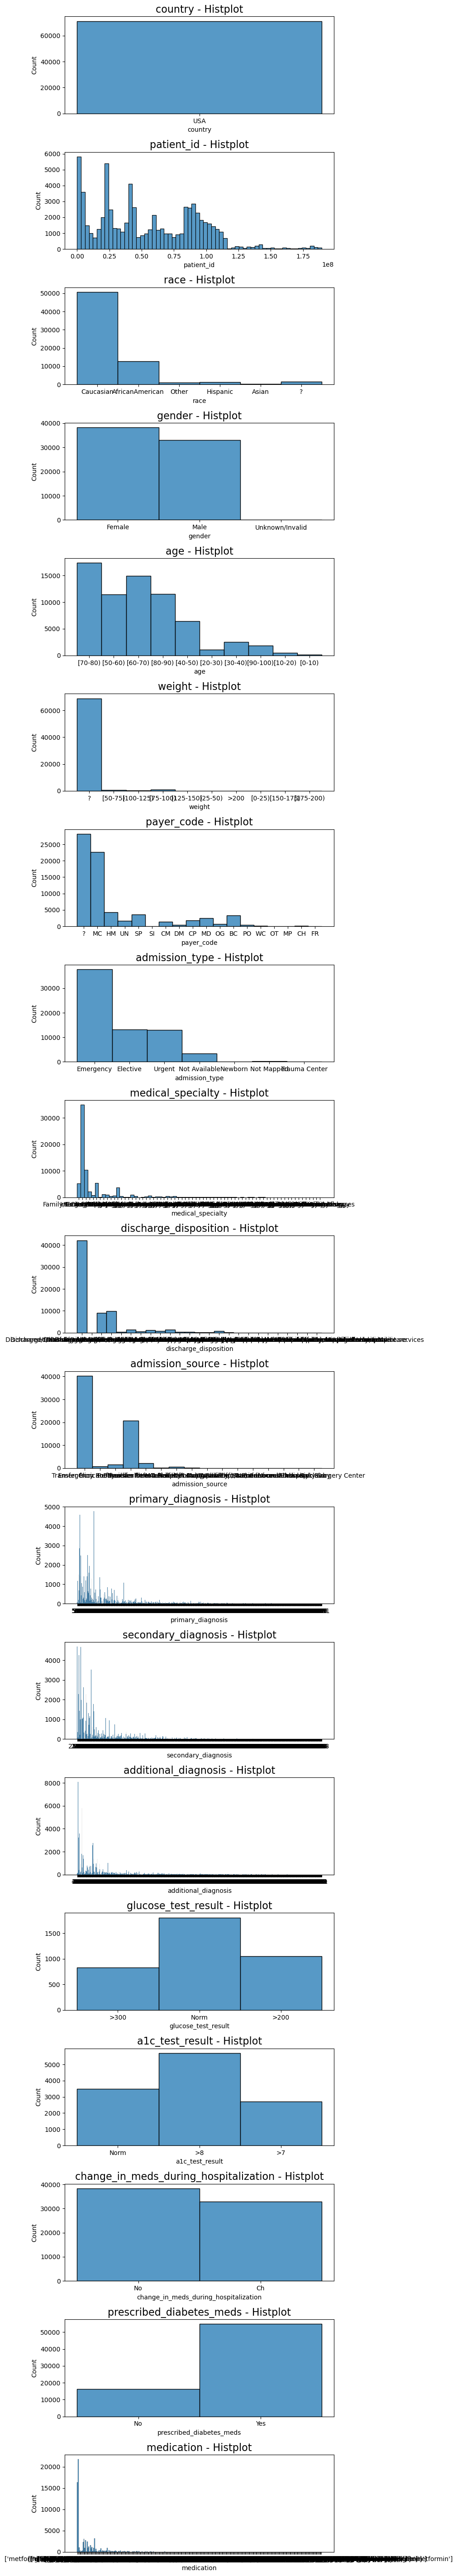

In [ ]:
# Non-Metric Features Plots
fig, axes = plt.subplots(nrows=len(non_metric_features), ncols=1, figsize=(10, 3 * len(non_metric_features)))

for i, col in enumerate(data[non_metric_features]):
    sns.histplot(data[col], ax=axes[i])
    axes[i].set_title(f"{col} - Histplot", size=16)

plt.tight_layout()
plt.show()

## **1.3. Data Visualization** <a class="anchor" id="section1.3">

<Axes: ylabel='age'>

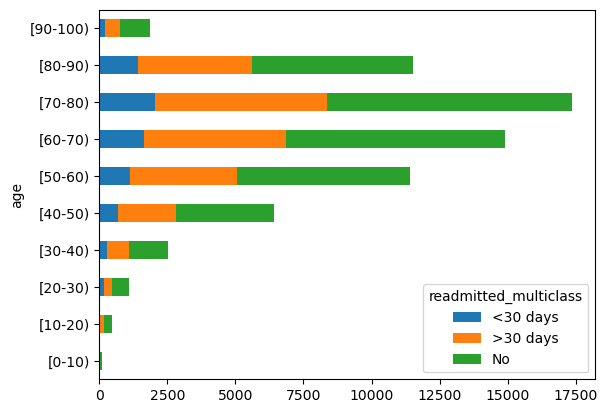

In [ ]:
data.groupby(['readmitted_multiclass', 'age']).size().unstack(fill_value = 0).T.plot(kind='barh', stacked=True)

**Diagnosis Variables (primary_diagnoses_categories, secondary_diagnoses_categories, additional_diagnoses_categories)**

In [ ]:
print(data['primary_diagnosis'].value_counts().nlargest(5), '\n',
      data['secondary_diagnosis'].value_counts().nlargest(5), '\n',
      data['additional_diagnosis'].value_counts().nlargest(5))

primary_diagnosis
428    4683
414    4576
786    2846
410    2418
486    2416
Name: count, dtype: int64 
 secondary_diagnosis
276    4591
428    4471
250    4247
427    3269
401    2617
Name: count, dtype: int64 
 additional_diagnosis
250             8027
401             5752
276             2951
428             2842
No Diagnosis    2830
Name: count, dtype: int64


In [ ]:
# Top 5 Diagnosis Codes per Target Class
data.groupby('readmitted_multiclass')['primary_diagnosis'].value_counts(normalize=True).groupby(level=0).nlargest(5).reset_index(level=0, drop=True)

readmitted_multiclass  primary_diagnosis
<30 days               428                  0.083396
                       414                  0.051195
                       410                  0.033333
                       434                  0.028679
                       486                  0.028176
>30 days               428                  0.086090
                       414                  0.059403
                       786                  0.040191
                       486                  0.039267
                       491                  0.030224
No                     414                  0.070590
                       428                  0.051321
                       786                  0.042573
                       410                  0.039656
                       486                  0.033511
Name: proportion, dtype: float64

In [ ]:
# Top 5 Secondary Diagnosis Codes per Target Class
data.groupby('readmitted_multiclass')['secondary_diagnosis'].value_counts(normalize=True).groupby(level=0).nlargest(5).reset_index(level=0, drop=True)

readmitted_multiclass  secondary_diagnosis
<30 days               428                    0.073836
                       276                    0.068428
                       427                    0.049811
                       250                    0.040377
                       403                    0.039371
>30 days               428                    0.076685
                       276                    0.067722
                       427                    0.051204
                       250                    0.046742
                       496                    0.037659
No                     250                    0.072204
                       276                    0.064184
                       428                    0.057024
                       427                    0.048613
                       401                    0.044109
Name: proportion, dtype: float64

In [ ]:
# Top 5 Additional Diagnosis Codes per Target Class
data.groupby('readmitted_multiclass')['additional_diagnosis'].value_counts(normalize=True).groupby(level=0).nlargest(5).reset_index(level=0, drop=True)

readmitted_multiclass  additional_diagnosis
<30 days               250                     0.087421
                       401                     0.062013
                       276                     0.053208
                       428                     0.050943
                       427                     0.039874
>30 days               250                     0.099835
                       401                     0.066838
                       428                     0.052972
                       276                     0.050440
                       427                     0.042643
No                     250                     0.127353
                       401                     0.094467
                       276                     0.050020
                       428                     0.039500
                       427                     0.036167
Name: proportion, dtype: float64

**Visits in Previous Year (outpatient_visits_in_previous_year,emergency_visits_in_previous_year, inpatient_visits_in_previous_year)**

<Axes: xlabel='readmitted_multiclass'>

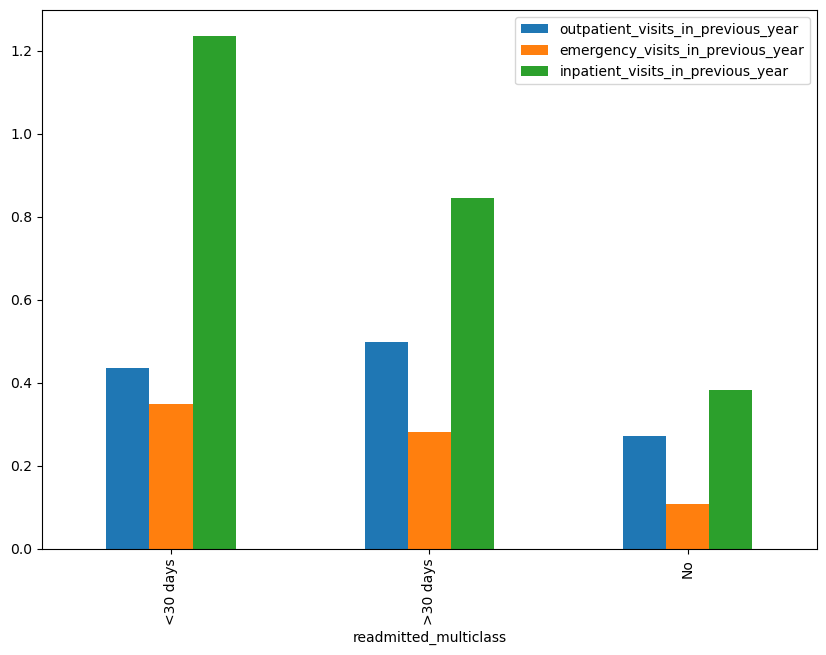

In [ ]:
data.groupby('readmitted_multiclass')[['outpatient_visits_in_previous_year', 'emergency_visits_in_previous_year', 'inpatient_visits_in_previous_year']].mean().plot(kind='bar', figsize=(10, 7))

<Axes: xlabel='age'>

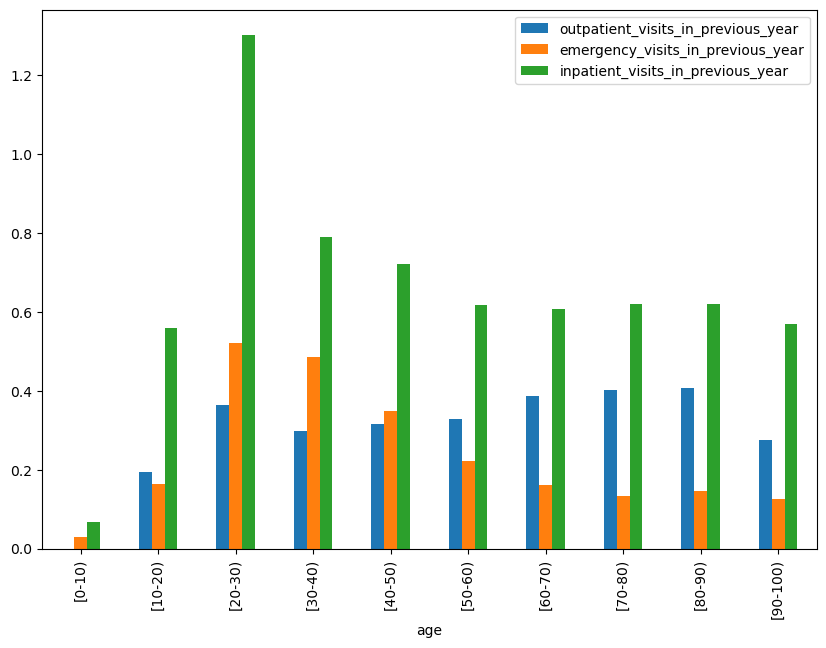

In [ ]:
data.groupby('age')[['outpatient_visits_in_previous_year', 'emergency_visits_in_previous_year', 'inpatient_visits_in_previous_year']].mean().plot(kind='bar', figsize=(10, 7))

<Axes: xlabel='length_of_stay_in_hospital'>

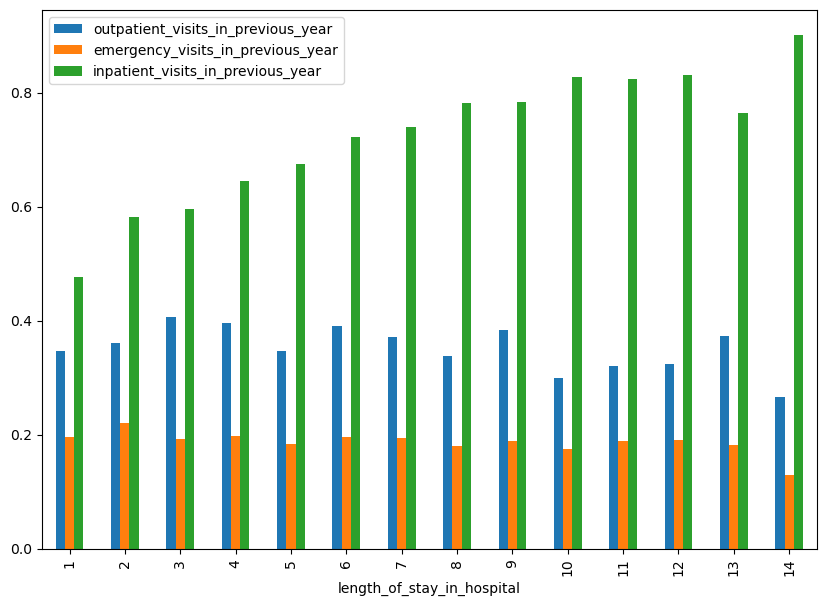

In [ ]:
data.groupby('length_of_stay_in_hospital')[['outpatient_visits_in_previous_year', 'emergency_visits_in_previous_year', 'inpatient_visits_in_previous_year']].mean().plot(kind='bar', figsize=(10, 7))

<Axes: xlabel='length_of_stay_in_hospital'>

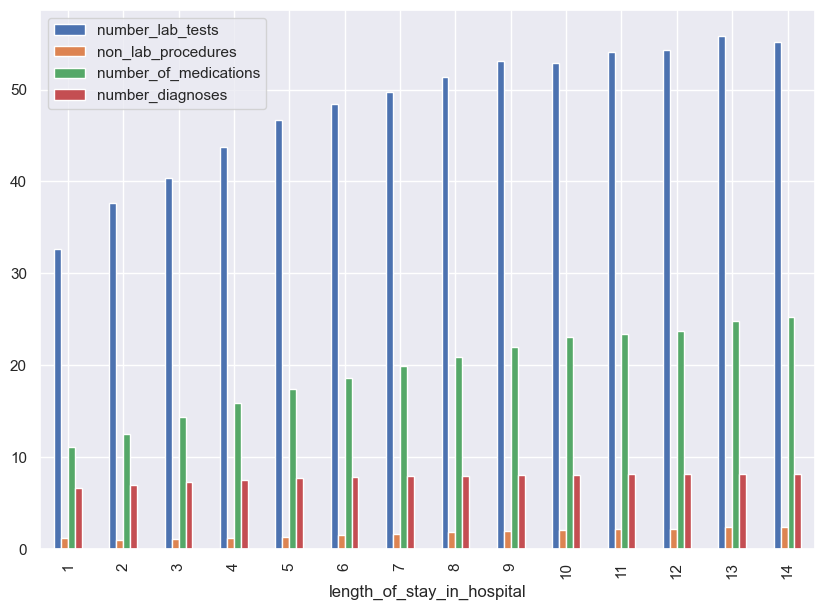

In [ ]:
data.groupby('length_of_stay_in_hospital')[['number_lab_tests', 'non_lab_procedures', 'number_of_medications', 'number_diagnoses']].mean().plot(kind='bar', figsize=(10, 7))

**payer_code**

<Axes: xlabel='payer_code'>

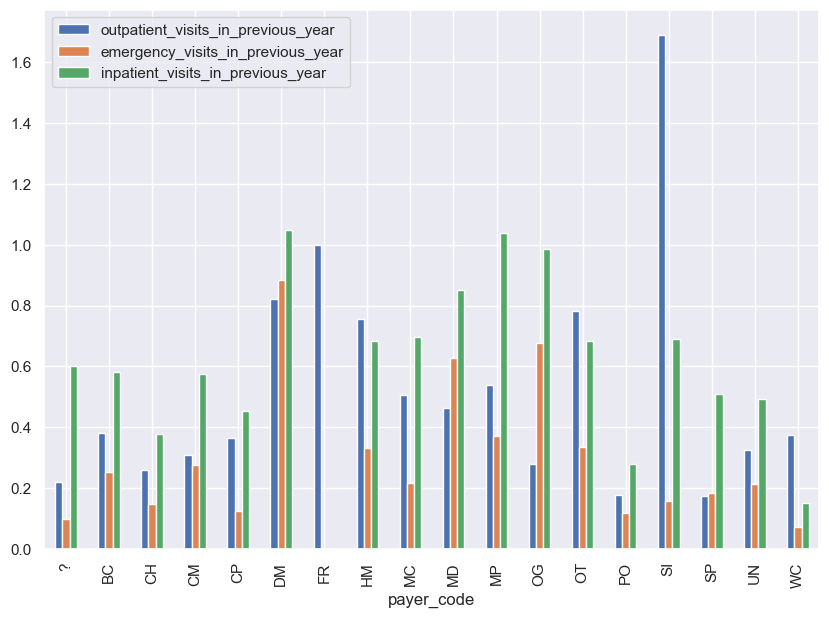

In [ ]:
data.groupby('payer_code')[['outpatient_visits_in_previous_year', 'emergency_visits_in_previous_year', 'inpatient_visits_in_previous_year']].mean().plot(kind='bar', figsize=(10, 7))

# 2. Data Pre-Processing <a class="anchor" id="section2">

## 2.1. **Incoherence Checking** <a class="anchor" id="section2.1">

In [ ]:
# Check how many duplicate diagnosis exists in the dataset
len(data[(data['primary_diagnosis'] == data['secondary_diagnosis']) |
    (data['primary_diagnosis'] == data['additional_diagnosis']) |
    (data['secondary_diagnosis'] == data['additional_diagnosis'])])

3997

In [ ]:
# If the primary_diagnosis, secondary_diagnosis, or additional_diagnosis repeat then we replace the secondary or additional to 'No Diagnosis'
data.loc[(data['primary_diagnosis'] == data['secondary_diagnosis']), ['secondary_diagnosis']] = 'No Diagnosis'
data.loc[(data['primary_diagnosis'] == data['additional_diagnosis']), ['additional_diagnosis']] = 'No Diagnosis'
data.loc[(data['secondary_diagnosis'] == data['additional_diagnosis']), ['additional_diagnosis']] = 'No Diagnosis'

In [ ]:
# Check how many patients were discharged as 'hospice' or 'expired'
expired_hospice = data[data['discharge_disposition'].fillna(' ').str.contains('expired|hospice', case = False)]
expired_hospice.groupby('readmitted_multiclass')['discharge_disposition'].value_counts()

readmitted_multiclass  discharge_disposition                                 
<30 days               Hospice / medical facility                                  16
                       Hospice / home                                              11
>30 days               Hospice / home                                              23
                       Hospice / medical facility                                   4
No                     Expired                                                   1135
                       Hospice / medical facility                                 241
                       Hospice / home                                             224
                       Expired at home. Medicaid only, hospice.                     6
                       Expired in a medical facility. Medicaid only, hospice.       1
Name: count, dtype: int64

In [ ]:
# Remove only 'Expired'
expired = data[data['discharge_disposition'].fillna(' ').str.contains('expired', case = False)]
data.drop(expired.index, axis = 0, inplace = True)

## 2.2. **Split the dataset (Train and Validation)** <a class="anchor" id="section2.2">


In [ ]:
data_le = data.copy()
label_encoder = LabelEncoder()

data_le['readmitted_multiclass'] = label_encoder.fit_transform(data_le['readmitted_multiclass'])
data_le['readmitted_multiclass'].unique()

array([1, 2, 0])

In [ ]:
# Repalce 'readmitted_multiclass' column in the dataset
data['readmitted_multiclass'] = data_le['readmitted_multiclass']

In [ ]:
data_split = data.copy()

In [ ]:
X = data_split.drop('readmitted_multiclass', axis = 1)
target_multiclass = data_split['readmitted_multiclass']

In [ ]:
# Split the data into train and validation
# Set the stratify parameter to ensure that the target maintains the same distribution structure.

X_train, X_val, y_train, y_val = train_test_split(X,
                                                  target_multiclass,
                                                  test_size = 0.3,
                                                  random_state = 42,
                                                  stratify = target_multiclass,
                                                  shuffle = True)

In [ ]:
y_train.value_counts()

readmitted_multiclass
2    26084
1    17416
0     5565
Name: count, dtype: int64

In [ ]:
y_val.value_counts()

readmitted_multiclass
2    11179
1     7465
0     2385
Name: count, dtype: int64

## 2.3. **Treating Outliers** <a class="anchor" id="section2.3">
<n> Instead of removing the outliers, we opted for a different approach by applying log and sqrt transformations to the skewed numerical variables.

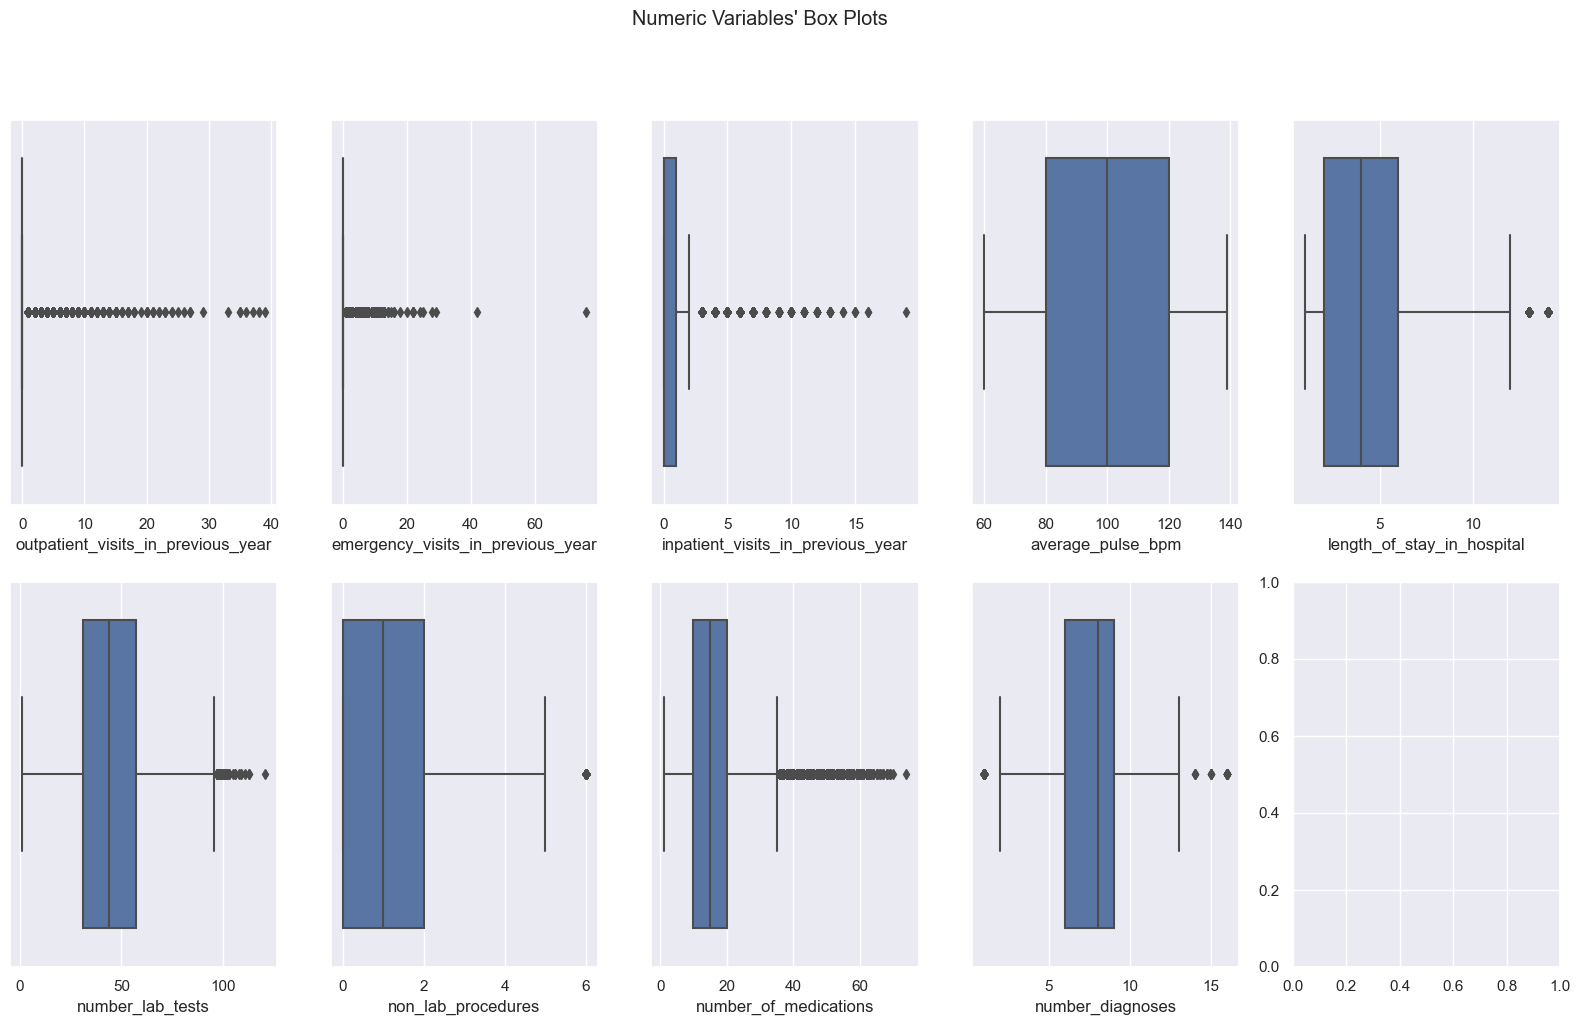

In [ ]:
# All Numeric Variables' Box Plots in one figure
sns.set()

fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(x = X_train[feat], ax = ax)

title = "Numeric Variables' Box Plots"
plt.suptitle(title)
plt.show()

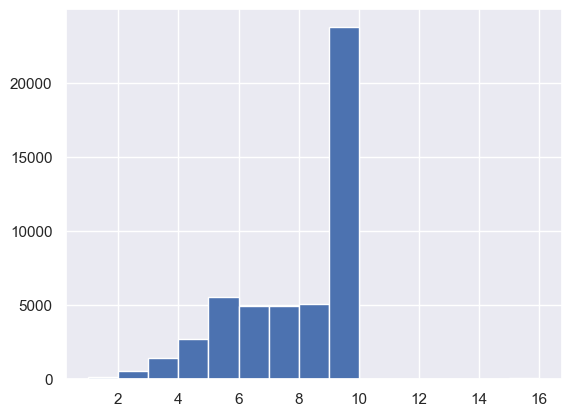

In [ ]:
plt.hist(X_train["number_diagnoses"], bins=15)
plt.show()

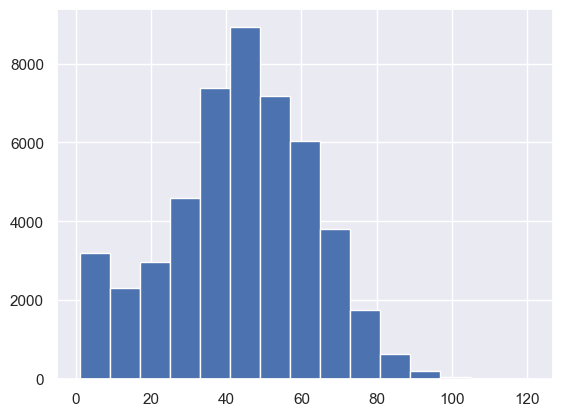

In [ ]:
plt.hist(X_train["number_lab_tests"], bins=15)
plt.show()

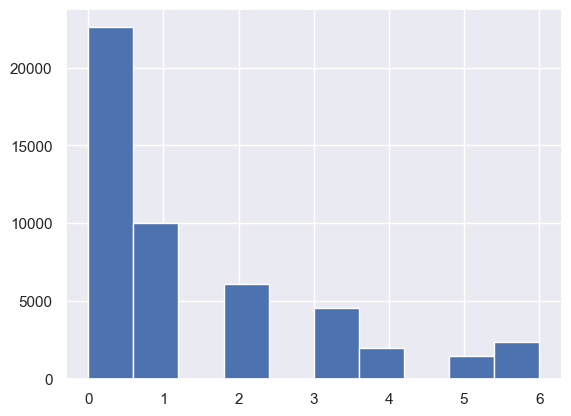

In [ ]:
plt.hist(X_train["non_lab_procedures"], bins=10)
plt.show()

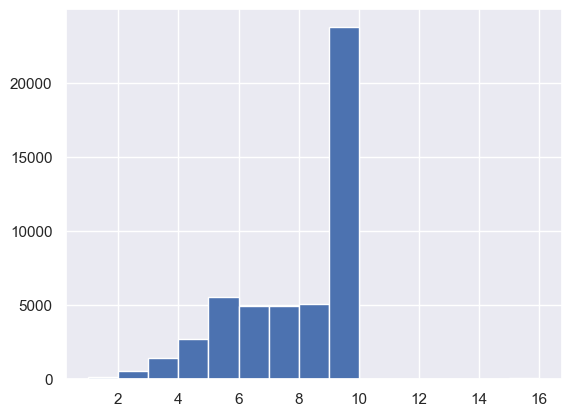

In [ ]:
plt.hist(X_train["number_diagnoses"], bins=15)
plt.show()

In [ ]:
len(X_train[X_train["outpatient_visits_in_previous_year"] > 30])

7

In [ ]:
len(X_train[X_train["emergency_visits_in_previous_year"] > 30])

2

In [ ]:
len(X_train[X_train["inpatient_visits_in_previous_year"] > 17])

1

In [ ]:
len(X_train[X_train["length_of_stay_in_hospital"] > 13])

501

In [ ]:
len(X_train[X_train["number_lab_tests"] > 100])

21

In [ ]:
len(X_train[X_train["non_lab_procedures"] > 5])

2367

In [ ]:
len(X_train[X_train["number_of_medications"] > 65])

15

In [ ]:
len(X_train[X_train["number_of_medications"] > 38])

848

In [ ]:
len(X_train[(X_train["number_diagnoses"] < 2) | (X_train["number_diagnoses"] > 13)])

156

In [ ]:
filters1 = (
    (X_train["outpatient_visits_in_previous_year"] <= 30)
    &
    (X_train["emergency_visits_in_previous_year"] <= 30)
    &
    (X_train["inpatient_visits_in_previous_year"] <=  17)
    &
    (X_train["number_lab_tests"] <= 110)
    &
    (X_train["number_of_medications"] <= 65)
    &
    (X_train["number_diagnoses"] >= 2)
    &
    (X_train["number_diagnoses"] <= 13))

df_1 = X_train[filters1]

In [ ]:
print('Percentage of data kept after removing outliers:', np.round(df_1.shape[0] / X_train.shape[0], 4))

Percentage of data kept after removing outliers: 0.9962


In [ ]:
# Outlier removal using only the IQR method

q25 = X_train[metric_features].quantile(.25)
q75 = X_train[metric_features].quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr

filters2 = []
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters2.append(X_train[metric].between(llim, ulim, inclusive='both'))

filters2 = pd.Series(np.all(filters2, 0))
df_2 = X_train[filters2.values]

print('Percentage of data kept after removing outliers:', np.round(df_2.shape[0] / X_train.shape[0], 4))

Percentage of data kept after removing outliers: 0.6609


In [ ]:
# Combine both methods (Manual and Boxplot)
df_3 = X_train[(filters1 | filters2)]
print('Percentage of data kept after removing outliers:', np.round(df_3.shape[0] / X_train.shape[0], 4))

Percentage of data kept after removing outliers: 0.9962


In [ ]:
# Update X_train
# X_train = df_3.copy()

In [ ]:
# Keep the same rows of X_train in y_train
# y_train = y_train.loc[X_train.index]

In [ ]:
# y_train.index == X_train.index

## 2.4. **Missing Values** <a class="anchor" id="section2.4">

In [ ]:
X_train = X_train.replace(["?", "Unknown/Invalid", "Not Available", "Not Mapped", " " , '[]' ],np.nan)

# Repeat for Validation
X_val = X_val.replace(["?", "Unknown/Invalid", "Not Available", "Not Mapped", " ", '[]' ],np.nan)

In [ ]:
# Train Dataset Missing values %
(X_train.isna().sum() / len(X_train) * 100).round(3)

country                                   0.000
patient_id                                0.000
race                                      6.964
gender                                    0.002
age                                       4.981
weight                                   96.835
payer_code                               39.507
outpatient_visits_in_previous_year        0.000
emergency_visits_in_previous_year         0.000
inpatient_visits_in_previous_year         0.000
admission_type                           10.117
medical_specialty                        48.823
average_pulse_bpm                         0.000
discharge_disposition                     4.637
admission_source                          6.573
length_of_stay_in_hospital                0.000
number_lab_tests                          0.000
non_lab_procedures                        0.000
number_of_medications                     0.000
primary_diagnosis                         0.018
secondary_diagnosis                     

In [ ]:
# The non-code values in 'payer_code' ("?") are due to people that don´t have insurance
# Hence, we imputed them with the label 'Not Insurance'.

X_train["payer_code"].replace(np.nan, "No Insurance", inplace = True)

X_val["payer_code"].replace(np.nan, "No Insurance", inplace = True)

In [ ]:
# The missing values in 'glucose_test_result' and 'a1c_test_result' are due to patients not taking these tests.
# Hence, we imputed them with the label 'Not Taken'.

X_train["glucose_test_result"].replace(np.nan, "Not Taken", inplace = True)
X_train["a1c_test_result"].replace(np.nan, "Not Taken",  inplace = True)

X_val["glucose_test_result"].replace(np.nan, "Not Taken", inplace = True)
X_val["a1c_test_result"].replace(np.nan, "Not Taken",  inplace = True)

In [ ]:
X_train['admission_source'].replace(np.nan, "Not Mapped", inplace = True)

X_val['admission_source'].replace(np.nan, "Not Mapped", inplace = True)

In [ ]:
# Replace '[]' as 'No Medication'
X_train['medication'].replace(np.nan, 'No Medication', inplace = True)

X_val['medication'].replace(np.nan, 'No Medication', inplace = True)

In [ ]:
# Assume that the Missing Values in thee second and additional diagnosis as 'No Diagnosis'
X_train['secondary_diagnosis'].replace(np.nan, "No Diagnosis", inplace = True)
X_train['additional_diagnosis'].replace(np.nan, "No Diagnosis", inplace = True)

X_val['secondary_diagnosis'].replace(np.nan, "No Diagnosis", inplace = True)
X_val['additional_diagnosis'].replace(np.nan, "No Diagnosis", inplace = True)

In [ ]:
# Train Dataset Missing values %
(X_train.isna().sum() / len(X_train) * 100).round(3)

country                                   0.000
patient_id                                0.000
race                                      6.964
gender                                    0.002
age                                       4.981
weight                                   96.835
payer_code                                0.000
outpatient_visits_in_previous_year        0.000
emergency_visits_in_previous_year         0.000
inpatient_visits_in_previous_year         0.000
admission_type                           10.117
medical_specialty                        48.823
average_pulse_bpm                         0.000
discharge_disposition                     4.637
admission_source                          0.000
length_of_stay_in_hospital                0.000
number_lab_tests                          0.000
non_lab_procedures                        0.000
number_of_medications                     0.000
primary_diagnosis                         0.018
secondary_diagnosis                     

In [ ]:
# Validation Dataset Missing values %
(X_val.isna().sum() / len(X_val) * 100).round(3)

country                                   0.000
patient_id                                0.000
race                                      7.490
gender                                    0.010
age                                       5.050
weight                                   96.847
payer_code                                0.000
outpatient_visits_in_previous_year        0.000
emergency_visits_in_previous_year         0.000
inpatient_visits_in_previous_year         0.000
admission_type                           10.324
medical_specialty                        49.417
average_pulse_bpm                         0.000
discharge_disposition                     4.727
admission_source                          0.000
length_of_stay_in_hospital                0.000
number_lab_tests                          0.000
non_lab_procedures                        0.000
number_of_medications                     0.000
primary_diagnosis                         0.033
secondary_diagnosis                     

## 2.5. **Feature Engenniring** <a class="anchor" id="section2.5">

**total_visits_in_previous_year**: Number of outpatient, emergency, and inpatient visits the patient made to the hospital in the year preceding the encounter.

In [ ]:
X_train['total_visits_in_previous_year'] = X_train['outpatient_visits_in_previous_year'] + X_train['emergency_visits_in_previous_year'] + X_train['inpatient_visits_in_previous_year']

In [ ]:
X_val['total_visits_in_previous_year'] = X_val['outpatient_visits_in_previous_year'] + X_val['emergency_visits_in_previous_year'] + X_val['inpatient_visits_in_previous_year']

**primary_diagnoses_categories, secondary_diagnoses_categories, additional_diagnoses_categories**: Variables represent the ICD9 Codes grouped in categories.

In [ ]:
# Based on the ICD9 Codes, we will create a variable that groups the codes into categories.
def categorize_icd9(icd9_code):

    # Add leading zeros to ensure three digits
    icd9_code = str(icd9_code).zfill(3)

    if '001' <= icd9_code <= '139':   return 'Infectious and Parasitic Diseases'

    elif '140' <= icd9_code <= '239': return 'Neoplasms'

    elif '240' <= icd9_code <= '279': return 'Endocrine, Nutritional, and Metabolic Diseases, and Immunity Disorders'

    elif '280' <= icd9_code <= '289': return 'Diseases of the Blood and Blood-Forming Organs'

    elif '290' <= icd9_code <= '319': return 'Mental Disorders'

    elif '320' <= icd9_code <= '389': return 'Diseases of the Nervous System and Sense Organs'

    elif '390' <= icd9_code <= '459': return 'Diseases of the Circulatory System'

    elif '460' <= icd9_code <= '519': return 'Diseases of the Respiratory System'

    elif '520' <= icd9_code <= '579': return 'Diseases of the Digestive System'

    elif '580' <= icd9_code <= '629': return 'Diseases of the Genitourinary System'

    elif '630' <= icd9_code <= '679': return 'Complications of Pregnancy, Childbirth, and the Puerperium'

    elif '680' <= icd9_code <= '709': return 'Diseases of the Skin and Subcutaneous Tissue'

    elif '710' <= icd9_code <= '739': return 'Diseases of the Musculoskeletal System and Connective Tissue'

    elif '740' <= icd9_code <= '759': return 'Congenital Anomalies'

    elif '760' <= icd9_code <= '779': return 'Certain Conditions Originating in the Perinatal Period'

    elif '780' <= icd9_code <= '799': return 'Symptoms, Signs, and Ill-Defined Conditions'

    elif '800' <= icd9_code <= '999': return 'Injury and Poisoning'

    elif icd9_code.startswith(('E', 'V')):  return 'External Causes of Injury and Supplemental Classification'

    else:return np.nan

In [ ]:
X_train['primary_diagnoses_categories'] = (X_train['primary_diagnosis'].apply(categorize_icd9))
X_train['secondary_diagnoses_categories'] = (X_train['secondary_diagnosis'].apply(categorize_icd9))
X_train['additional_diagnoses_categories'] = (X_train['additional_diagnosis'].apply(categorize_icd9))

In [ ]:
X_train['primary_diagnoses_categories'].unique()

array(['Diseases of the Genitourinary System',
       'Infectious and Parasitic Diseases',
       'Endocrine, Nutritional, and Metabolic Diseases, and Immunity Disorders',
       'Diseases of the Circulatory System',
       'Symptoms, Signs, and Ill-Defined Conditions',
       'Injury and Poisoning', 'Mental Disorders',
       'Diseases of the Respiratory System', 'Neoplasms',
       'Diseases of the Digestive System',
       'Diseases of the Musculoskeletal System and Connective Tissue',
       'External Causes of Injury and Supplemental Classification',
       'Diseases of the Skin and Subcutaneous Tissue',
       'Diseases of the Nervous System and Sense Organs',
       'Diseases of the Blood and Blood-Forming Organs',
       'Complications of Pregnancy, Childbirth, and the Puerperium',
       'Congenital Anomalies', nan], dtype=object)

In [ ]:
# Repeat for Validation
X_val['primary_diagnoses_categories'] = (X_val['primary_diagnosis'].apply(categorize_icd9))
X_val['secondary_diagnoses_categories'] = (X_val['secondary_diagnosis'].apply(categorize_icd9))
X_val['additional_diagnoses_categories'] = (X_val['additional_diagnosis'].apply(categorize_icd9))

In [ ]:
# Apply the same missing value treatment as secondary_diagnosis and additional_diagnosis:
# If the value is null, impute 'Not Diagnosis'.

X_train['secondary_diagnoses_categories'].replace(np.nan, "No Diagnosis", inplace = True)
X_train['additional_diagnoses_categories'].replace(np.nan, "No Diagnosis", inplace = True)

X_val['secondary_diagnoses_categories'].replace(np.nan, "No Diagnosis", inplace = True)
X_val['additional_diagnoses_categories'].replace(np.nan, "No Diagnosis", inplace = True)

**type2**: Defines if the patient has type 2 diabetes.

In [ ]:
# Insulin is used in the treatment and management of diabetes mellitus type-1 and sometimes diabetes mellitus type-2
# Metformin is a medicine used to treat type 2 diabetes and gestational diabetes

X_train['type2'] = np.nan

X_train.loc[ ~X_train['medication'].astype(str).str.contains('metformin'), 'type2'] = 0

X_train.loc[ X_train['medication'].astype(str).str.contains('metformin'), 'type2'] = 1

In [ ]:
X_val['type2'] = np.nan

X_val.loc[ ~X_val['medication'].astype(str).str.contains('metformin'), 'type2'] = 0

X_val.loc[ X_val['medication'].astype(str).str.contains('metformin'), 'type2'] = 1

In [ ]:
X_train["length_of_stay_in_hospital"].unique()

array([ 2,  7,  4,  9, 10,  1,  3,  5,  6, 13, 11,  8, 14, 12],
      dtype=int64)

**diagnosed_diabetes**: Column take states whether the patients was diagnosed with diabetes.

In [ ]:
# https://www.ncbi.nlm.nih.gov/books/NBK368403/table/sb203.t5/

print(
    'Diabetes in Primary Diagnosis:', len(X_train.loc[X_train['primary_diagnosis'].astype(str).str.contains('250')]),
    '\nDiabetes in Secondary Diagnosis:', len(X_train.loc[X_train['secondary_diagnosis'].astype(str).str.contains('250')]),
    '\nDiabetes in Additional Diagnosis:', len(X_train.loc[X_train['additional_diagnosis'].astype(str).str.contains('250')])
)

Diabetes in Primary Diagnosis: 4284 
Diabetes in Secondary Diagnosis: 6261 
Diabetes in Additional Diagnosis: 8328


In [ ]:
X_train['diagnosed_diabetes'] = np.nan

# If the patient was diagnosed with diabetes in any diagnosis (1: 'Yes')
X_train.loc[  X_train['primary_diagnosis'].astype(str).str.contains('250')
                  | X_train['secondary_diagnosis'].astype(str).str.contains('250')
                  | X_train['additional_diagnosis'].astype(str).str.contains('250'), 'diagnosed_diabetes'] = 1

# If the patient was not diagnosed with diabetes in any diagnosis (0: 'No')
X_train.loc[~X_train['primary_diagnosis'].astype(str).str.contains('250')
                  & ~X_train['secondary_diagnosis'].astype(str).str.contains('250')
                  & ~X_train['secondary_diagnosis'].astype(str).str.contains('250'), 'diagnosed_diabetes'] = 0

In [ ]:
(X_train['diagnosed_diabetes'].value_counts() / len(X_train) * 100).round(2)

diagnosed_diabetes
0.0    78.61
1.0    21.39
Name: count, dtype: float64

In [ ]:
X_train.head(5)

,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,...,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,total_visits_in_previous_year,primary_diagnoses_categories,secondary_diagnoses_categories,additional_diagnoses_categories,type2,diagnosed_diabetes
encounter_id,,,,,,,,,,,,,,,,,,,,,
554804,USA,1777032,AfricanAmerican,Male,[50-60),NaN,No Insurance,0,0,0,...,Not Taken,No,Yes,['glyburide'],0,Diseases of the Genitourinary System,Diseases of the Circulatory System,"Endocrine, Nutritional, and Metabolic Diseases...",0.0,0.0
824727,USA,19797408,Hispanic,Male,[50-60),NaN,No Insurance,0,0,1,...,Not Taken,No,No,No Medication,1,Infectious and Parasitic Diseases,Diseases of the Circulatory System,"Endocrine, Nutritional, and Metabolic Diseases...",0.0,0.0
834488,USA,102292182,Caucasian,Male,[30-40),NaN,No Insurance,0,0,0,...,>8,Ch,Yes,"['glipizide', 'rosiglitazone', 'insulin']",0,"Endocrine, Nutritional, and Metabolic Diseases...","Endocrine, Nutritional, and Metabolic Diseases...","Endocrine, Nutritional, and Metabolic Diseases...",0.0,1.0
306223,USA,3545352,Caucasian,Female,[60-70),NaN,No Insurance,0,0,0,...,Not Taken,Ch,Yes,['insulin'],0,"Endocrine, Nutritional, and Metabolic Diseases...","Endocrine, Nutritional, and Metabolic Diseases...",Diseases of the Genitourinary System,0.0,1.0
342881,USA,2178603,Caucasian,Female,[40-50),NaN,No Insurance,0,0,0,...,Not Taken,No,Yes,['insulin'],0,Diseases of the Circulatory System,Diseases of the Circulatory System,Diseases of the Digestive System,0.0,0.0


In [ ]:
X_val['diagnosed_diabetes'] = np.nan

# If the patient was diagnosed with diabetes in any diagnosis
X_val.loc[X_val['primary_diagnosis'].astype(str).str.contains('250')
                  | X_val['secondary_diagnosis'].astype(str).str.contains('250')
                  | X_val['additional_diagnosis'].astype(str).str.contains('250'), 'diagnosed_diabetes'] = 1

# If the patient was not diagnosed with diabetes in any diagnosis
X_val.loc[~X_val['primary_diagnosis'].astype(str).str.contains('250')
                  & ~X_val['secondary_diagnosis'].astype(str).str.contains('250')
                  & ~X_val['secondary_diagnosis'].astype(str).str.contains('250'), 'diagnosed_diabetes'] = 0

In [ ]:
X_val.head(5)

,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,...,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,total_visits_in_previous_year,primary_diagnoses_categories,secondary_diagnoses_categories,additional_diagnoses_categories,type2,diagnosed_diabetes
encounter_id,,,,,,,,,,,,,,,,,,,,,
855485,USA,23492583,Caucasian,Male,[70-80),NaN,No Insurance,0,0,0,...,Not Taken,No,No,No Medication,0,Injury and Poisoning,Diseases of the Digestive System,Diseases of the Circulatory System,0.0,0.0
993641,USA,38617533,Caucasian,Female,[60-70),NaN,MD,0,0,2,...,Not Taken,Ch,Yes,"['metformin', 'pioglitazone']",2,Diseases of the Circulatory System,Diseases of the Circulatory System,Diseases of the Respiratory System,1.0,0.0
186944,USA,42526881,Caucasian,Female,[60-70),NaN,SP,0,0,0,...,Not Taken,Ch,Yes,"['pioglitazone', 'insulin']",0,Diseases of the Respiratory System,Diseases of the Circulatory System,External Causes of Injury and Supplemental Cla...,0.0,0.0
818203,USA,18458415,Hispanic,Male,[40-50),NaN,No Insurance,0,0,0,...,Not Taken,No,No,No Medication,0,Diseases of the Circulatory System,"Endocrine, Nutritional, and Metabolic Diseases...",Diseases of the Circulatory System,0.0,1.0
827185,USA,5371776,Caucasian,Female,[20-30),NaN,No Insurance,0,0,1,...,Not Taken,Ch,Yes,['insulin'],1,"Endocrine, Nutritional, and Metabolic Diseases...",Diseases of the Respiratory System,Diseases of the Circulatory System,0.0,1.0


**race**: Group 'Asian', 'Hispanic', and 'Other.

In [ ]:
X_train['race'] = X_train['race'].replace({'Hispanic': 'Other','Asian': 'Other'})

In [ ]:
X_val['race'] = X_val['race'].replace({'Hispanic': 'Other', 'Asian': 'Other'})

<Axes: xlabel='race', ylabel='Count'>

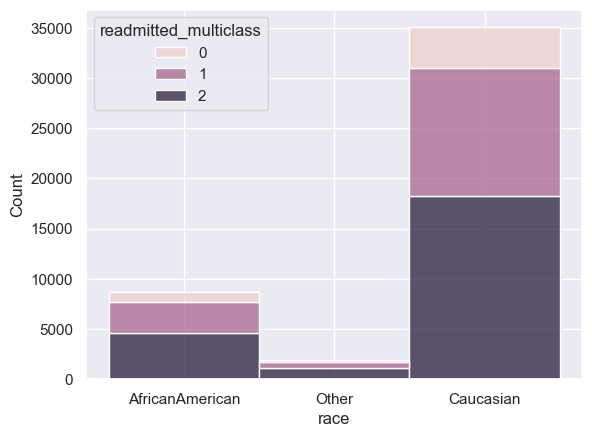

In [ ]:
sns.histplot(data = X_train, x = "race", hue = y_train, multiple = "stack")

**age**: Transform variable in numeric by doing the mean between the 2 interval values.

<Axes: xlabel='age', ylabel='Count'>

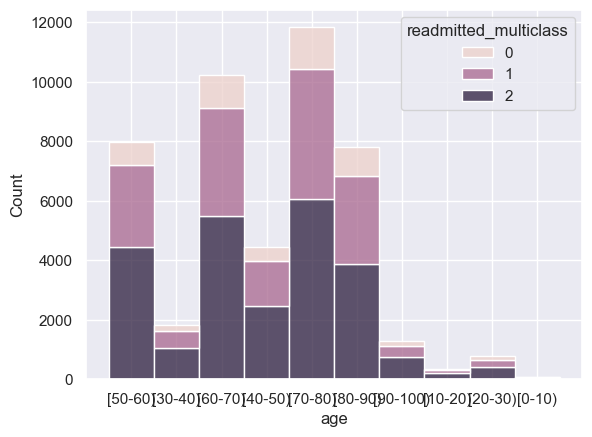

In [ ]:
sns.histplot(data = X_train, x = "age", hue = y_train, multiple = "stack")

In [ ]:
X_train['age'] = X_train['age'].replace({'[0-10)': 5, '[10-20)': 15, '[20-30)': 25, '[30-40)': 35, '[40-50)': 45,
                                        '[50-60)': 55, '[60-70)': 65, '[70-80)': 75, '[80-90)': 85, '[90-100)': 95})
X_train['age'].value_counts()

age
75.0    11836
65.0    10235
55.0     7978
85.0     7822
45.0     4457
35.0     1821
95.0     1287
25.0      773
15.0      339
5.0        73
Name: count, dtype: int64

In [ ]:
X_val['age'] = X_val['age'].replace({'[0-10)': 5, '[10-20)': 15, '[20-30)': 25, '[30-40)': 35, '[40-50)': 45,
                                    '[50-60)': 55, '[60-70)': 65, '[70-80)': 75, '[80-90)': 85, '[90-100)': 95})

**payer_code**: Decrease the number of categories (Group classess that represent less than 5% of the dataset)

<Axes: xlabel='payer_code', ylabel='Count'>

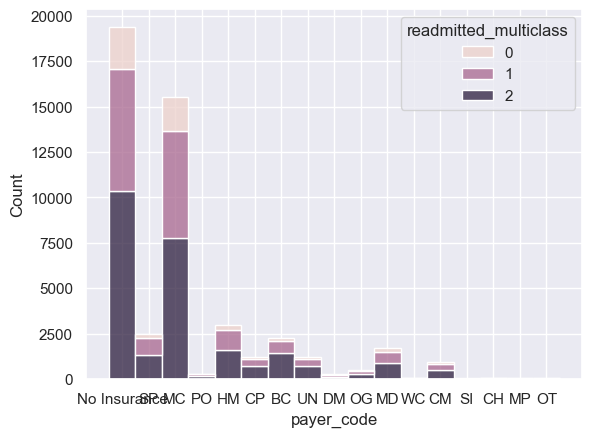

In [ ]:
sns.histplot(data = X_train, x = "payer_code", hue = y_train, multiple = "stack")

In [ ]:
X_train['payer_code'].value_counts(normalize = True)

payer_code
No Insurance    0.395068
MC              0.316845
HM              0.060226
SP              0.050810
BC              0.046550
MD              0.035239
CP              0.025252
UN              0.024396
CM              0.018812
OG              0.010476
PO              0.005972
DM              0.005381
WC              0.001386
CH              0.001264
OT              0.000876
MP              0.000754
SI              0.000693
Name: proportion, dtype: float64

In [ ]:
X_train['payer_code'] = X_train['payer_code'].replace({'MP': 'Other','FR': 'Other','SI': 'Other','CH': 'Other',
                                                   'PO': 'Other','OT': 'Other','WC': 'Other','DM': 'Other',
                                                   'OG': 'Other','CM': 'Other', 'UN': 'Other', 'CP': 'Other', 'MD': 'Other',
                                                   'BC': 'Other'})
X_train['payer_code'].value_counts()

payer_code
No Insurance    19384
MC              15546
Other            8687
HM               2955
SP               2493
Name: count, dtype: int64

In [ ]:
X_val['payer_code'] = X_val['payer_code'].replace({'MP': 'Other','FR': 'Other','SI': 'Other','CH': 'Other',
                                                   'PO': 'Other','OT': 'Other','WC': 'Other','DM': 'Other',
                                                   'OG': 'Other','CM': 'Other', 'UN': 'Other', 'CP': 'Other', 'MD': 'Other',
                                                   'BC': 'Other'})

**admitted_urgent/emergency**: Defines if the patient was admitted has 'Emergency' or 'Urgent

<Axes: xlabel='admission_type', ylabel='Count'>

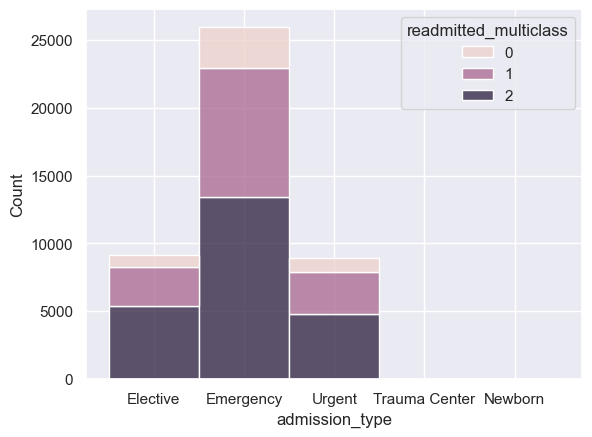

In [ ]:
sns.histplot(data = X_train, x = 'admission_type', hue = y_train, multiple = "stack")

In [ ]:
X_train["length_of_stay_in_hospital"].unique()

array([ 2,  7,  4,  9, 10,  1,  3,  5,  6, 13, 11,  8, 14, 12],
      dtype=int64)

In [ ]:
X_train['admitted_urgent/emergency'] = np.nan

# If the admission source is Emergency or Urgent, set 'admitted_urgent/emergency' to 1
X_train.loc[(X_train['admission_type'] == 'Emergency') | (X_train['admission_type'] == 'Urgent'), 'admitted_urgent/emergency'] = 1

# If the admission source is not Emergency and not Urgent, set 'admitted_urgent/emergency' to 0
X_train.loc[(X_train['admission_type'] != 'Emergency') & (X_train['admission_type'] != 'Urgent'), 'admitted_urgent/emergency'] = 0

X_train['admitted_urgent/emergency'].value_counts()

admitted_urgent/emergency
1.0    34907
0.0    14158
Name: count, dtype: int64

In [ ]:
X_val['admitted_urgent/emergency'] = np.nan

# If the admission source is Emergency or Urgent, set 'admitted_urgent/emergency' to 1
X_val.loc[(X_val['admission_type'] == 'Emergency') | (X_val['admission_type'] == 'Urgent'), 'admitted_urgent/emergency'] = 1

# If the admission source is not Emergency and not Urgent, set 'admitted_urgent/emergency' to 0
X_val.loc[(X_val['admission_type'] != 'Emergency') & (X_val['admission_type'] != 'Urgent'), 'admitted_urgent/emergency'] = 0

X_val['admitted_urgent/emergency'].value_counts()

admitted_urgent/emergency
1.0    14918
0.0     6111
Name: count, dtype: int64

**medical_speciality**

In [ ]:
# Surgery
X_train['medical_specialty'].replace({'Surgery-Cardiovascular/Thoracic': 'Surgery', 'Surgery-General': 'Surgery',
                                      'SurgicalSpecialty': 'Surgery', 'Surgery-Vascular': 'Surgery',
                                      'Surgery-Cardiovascular': 'Surgery', 'Surgery-Thoracic': 'Surgery',
                                      'Surgery-Maxillofacial': 'Surgery',  'Surgery-Plastic': 'Surgery',
                                      'Surgeon': 'Surgery', 'Surgery-Pediatric': 'Surgery', 'Surgery-Neuro': 'Surgery',
                                      'Surgery-Colon&Rectal': 'Surgery'}, inplace = True)

X_val['medical_specialty'].replace({'Surgery-Cardiovascular/Thoracic': 'Surgery', 'Surgery-General': 'Surgery',
                                      'SurgicalSpecialty': 'Surgery', 'Surgery-Vascular': 'Surgery',
                                      'Surgery-Cardiovascular': 'Surgery', 'Surgery-Thoracic': 'Surgery',
                                      'Surgery-Maxillofacial': 'Surgery',  'Surgery-Plastic': 'Surgery',
                                      'Surgeon': 'Surgery', 'Surgery-Pediatric': 'Surgery', 'Surgery-Neuro': 'Surgery',
                                      'Surgery-Colon&Rectal': 'Surgery'}, inplace = True)

In [ ]:
# Pediatrics
X_train['medical_specialty'].replace({'Pediatrics-CriticalCare': 'Pediatrics', 'Pediatrics-Hematology-Oncology': 'Pediatrics',
                                      'Anesthesiology-Pediatric': 'Pediatrics', 'Pediatrics-Endocrinology': 'Pediatrics',
                                      'Pediatrics-Pulmonology': 'Pediatrics', 'Pediatrics-Neurology': 'Pediatrics', 'Cardiology-Pediatric': 'Pediatrics',
                                      'Pediatrics-InfectiousDiseases': 'Pediatrics', 'Pediatrics-EmergencyMedicine': 'Pediatrics',
                                      'Pediatrics-AllergyandImmunology': 'Pediatrics'}, inplace = True)

X_val['medical_specialty'].replace({'Pediatrics-CriticalCare': 'Pediatrics', 'Pediatrics-Hematology-Oncology': 'Pediatrics',
                                      'Anesthesiology-Pediatric': 'Pediatrics', 'Pediatrics-Endocrinology': 'Pediatrics',
                                      'Pediatrics-Pulmonology': 'Pediatrics', 'Pediatrics-Neurology': 'Pediatrics', 'Cardiology-Pediatric': 'Pediatrics',
                                      'Pediatrics-InfectiousDiseases': 'Pediatrics', 'Pediatrics-EmergencyMedicine': 'Pediatrics',
                                      'Pediatrics-AllergyandImmunology': 'Pediatrics'}, inplace = True)

In [ ]:
# Psychiatry
X_train['medical_specialty'].replace({'Psychiatry-Child/Adolescent': 'Psychiatry'}, inplace = True)

X_val['medical_specialty'].replace({'Psychiatry-Child/Adolescent': 'Psychiatry'}, inplace = True)

In [ ]:
# Women's Health
X_train['medical_specialty'].replace({'ObstetricsandGynecology': "Women's Health", 'Gynecology': "Women's Health",
                                      'Obsterics&Gynecology-GynecologicOnco': "Women's Health",
                                      'Obstetrics': "Women's Health"}, inplace = True)

X_val['medical_specialty'].replace({'ObstetricsandGynecology': "Women's Health", 'Gynecology': "Women's Health",
                                      'Obsterics&Gynecology-GynecologicOnco': "Women's Health",
                                      'Obstetrics': "Women's Health"}, inplace = True)

<Axes: xlabel='medical_specialty', ylabel='Count'>

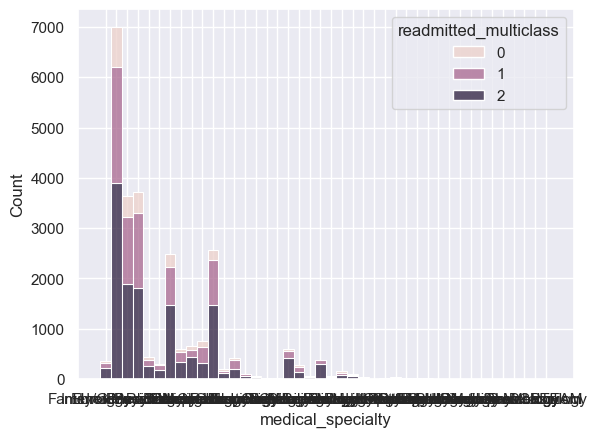

In [ ]:
sns.histplot(data = X_train, x = 'medical_specialty', hue = y_train, multiple = "stack")

**discharge_disposition**: less categories (group the classes that have less than 5% of observations)

In [ ]:
# Within Facility Transfer
X_train['discharge_disposition'].replace({
            "Discharged/transferred to SNF": "Within Facility Transfer",
            'Discharged/transferred/referred to this institution for outpatient services': "Within Facility Transfer",
            "Discharged/transferred to ICF": "Within Facility Transfer",
            "Discharged/transferred within this institution to Medicare approved swing bed": "Within Facility Transfer",
            'Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital': "Within Facility Transfer"}, inplace = True)

X_val['discharge_disposition'].replace({
            "Discharged/transferred to SNF": "Within Facility Transfer",
            'Discharged/transferred/referred to this institution for outpatient services': "Within Facility Transfer",
            "Discharged/transferred to ICF": "Within Facility Transfer",
            "Discharged/transferred within this institution to Medicare approved swing bed": "Within Facility Transfer",
            'Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital': "Within Facility Transfer"}, inplace = True)

In [ ]:
# Another Facility Transfer
X_train['discharge_disposition'].replace({
    "Discharged/transferred to another short term hospital": "Another Facility Transfer",
    "Discharged/transferred to another rehab fac including rehab units of a hospital .": "Another Facility Transfer",
    "Discharged/transferred/referred another institution for outpatient services": "Another Facility Transfer",
    "Discharged/transferred to a long term care hospital.": "Another Facility Transfer",
    'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.': 'Another Facility Transfer',
    "Discharged/transferred to a federal health care facility.": "Another Facility Transfer",
    'Hospice / medical facility': 'Another Facility Transfer',
    'Discharged/transferred to another type of inpatient care institution': 'Another Facility Transfer'}, inplace = True)

X_val['discharge_disposition'].replace({
    "Discharged/transferred to another short term hospital": "Another Facility Transfer",
    "Discharged/transferred to another rehab fac including rehab units of a hospital .": "Another Facility Transfer",
    "Discharged/transferred/referred another institution for outpatient services": "Another Facility Transfer",
    "Discharged/transferred to a long term care hospital.": "Another Facility Transfer",
    'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.': 'Another Facility Transfer',
    "Discharged/transferred to a federal health care facility.": "Another Facility Transfer",
    'Hospice / medical facility': 'Another Facility Transfer',
    'Discharged/transferred to another type of inpatient care institution': 'Another Facility Transfer'}, inplace = True)

In [ ]:
# Home Discharge
X_train['discharge_disposition'].replace({'Discharged to home': 'Home Discharge',
                 'Discharged/transferred to home with home health service': 'Home Discharge',
                 'Discharged/transferred to home under care of Home IV provider': 'Home Discharge',
                 'Hospice / home': 'Home Discharge'}, inplace = True)

X_val['discharge_disposition'].replace({'Discharged to home': 'Home Discharge',
                 'Discharged/transferred to home with home health service': 'Home Discharge',
                 'Discharged/transferred to home under care of Home IV provider': 'Home Discharge',
                 'Hospice / home': 'Home Discharge'}, inplace = True)

In [ ]:
# Other Situations
X_train['discharge_disposition'].replace({'Admitted as an inpatient to this hospital': 'Other',
                 'Left AMA': 'Other',
                 'Neonate discharged to another hospital for neonatal aftercare': 'Other'}, inplace = True)

X_val['discharge_disposition'].replace({'Admitted as an inpatient to this hospital': 'Other',
                 'Left AMA': 'Other',
                 'Neonate discharged to another hospital for neonatal aftercare': 'Other'}, inplace = True)

In [ ]:
X_train["length_of_stay_in_hospital"].unique()

array([ 2,  7,  4,  9, 10,  1,  3,  5,  6, 13, 11,  8, 14, 12],
      dtype=int64)

**admission_source**: less categories (group the classes into 4 categories: 'Emergency Room', 'Transfer', 'Referral', 'Other')

In [ ]:
# Remove the initial space in the admission_source classes
X_train['admission_source'] = X_train['admission_source'].str.replace('^ ', '', regex=True)
X_val['admission_source'] = X_val['admission_source'].str.replace('^ ', '', regex=True)

In [ ]:
X_train['admission_source'].value_counts(normalize = True)

admission_source
Emergency Room                                               0.565923
Physician Referral                                           0.290696
Not Mapped                                                   0.067258
Transfer from a hospital                                     0.031346
Transfer from another health care facility                   0.022521
Clinic Referral                                              0.010863
Transfer from a Skilled Nursing Facility (SNF)               0.008071
HMO Referral                                                 0.001753
Not Available                                                0.001182
Transfer from hospital inpt/same fac reslt in a sep claim    0.000102
Transfer from critial access hospital                        0.000102
Court/Law Enforcement                                        0.000102
Transfer from Ambulatory Surgery Center                      0.000041
Sick Baby                                                    0.000020
Nor

In [ ]:
X_train['admission_source'].replace({'Physician Referral': 'Referral', 'Transfer from a hospital': 'Transfer',
                                'Transfer from another health care facility': 'Transfer',
                                'Clinic Referral': 'Referral', 'Transfer from a Skilled Nursing Facility (SNF)': 'Transfer',
                                 'Transfer from hospital inpt/same fac reslt in a sep claim': 'Transfer',
                                 'HMO Referral': 'Referral', 'Court/Law Enforcement': 'Other',
                                 'Transfer from Ambulatory Surgery Center': 'Transfer',
                                 'Transfer from critial access hospital': 'Transfer',
                                 'Extramural Birth': 'Other', 'Normal Delivery': 'Other', 'Sick Baby': 'Other', 'Not Available': 'Not Mapped'}, inplace = True)

In [ ]:
X_val['admission_source'].replace({'Physician Referral': 'Referral', 'Transfer from a hospital': 'Transfer',
                                'Transfer from another health care facility': 'Transfer',
                                'Clinic Referral': 'Referral', 'Transfer from a Skilled Nursing Facility (SNF)': 'Transfer',
                                 'Transfer from hospital inpt/same fac reslt in a sep claim': 'Transfer',
                                 'HMO Referral': 'Referral', 'Court/Law Enforcement': 'Other',
                                 'Transfer from Ambulatory Surgery Center': 'Transfer',
                                 'Transfer from critial access hospital': 'Transfer',
                                 'Extramural Birth': 'Other', 'Normal Delivery': 'Other', 'Sick Baby': 'Other', 'Not Available': 'Not Mapped'}, inplace = True)

<Axes: xlabel='admission_source', ylabel='Count'>

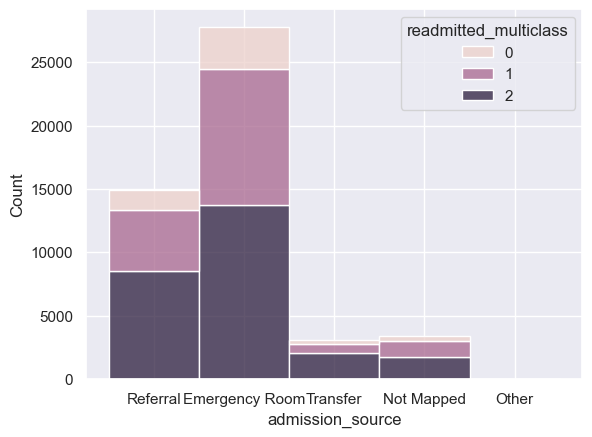

In [ ]:
sns.histplot(data = X_train, x = 'admission_source', hue = y_train, multiple = "stack")

**encounter_count**

In [ ]:
X_train['encounter_count'] = X_train.groupby('patient_id')['patient_id'].transform('count')

# Repeat for Validation
X_val['encounter_count'] = X_val.groupby('patient_id')['patient_id'].transform('count')

In [ ]:
X_train.drop(["patient_id"], axis = 1, inplace = True)
X_val.drop(["patient_id"], axis = 1, inplace = True)

non_metric_features.remove('patient_id')

### 2.5.1. **Convert Variables to Dummy** <a class="anchor" id="section2.5.1">

In [ ]:
# Female
X_train['Female'] = X_train['gender'].replace({'Female': 1,'Male': 0})
X_train['Female'].value_counts()

Female
1.0    26314
0.0    22750
Name: count, dtype: int64

In [ ]:
X_val['Female'] = X_val['gender'].replace({'Female': 1, 'Male': 0})
X_val['Female'].value_counts()

Female
1.0    11343
0.0     9684
Name: count, dtype: int64

In [ ]:
X_train.drop('gender', axis = 1, inplace = True)
X_val.drop('gender', axis = 1, inplace = True)

non_metric_features.remove('gender')

In [ ]:
# Convert change in medication to dummy variable
X_train['change_in_meds_during_hospitalization'].replace({'No': 0,'Ch': 1}, inplace = True)
X_train['change_in_meds_during_hospitalization'].value_counts()

change_in_meds_during_hospitalization
0    26262
1    22803
Name: count, dtype: int64

In [ ]:
X_val['change_in_meds_during_hospitalization'].replace({'No': 0,'Ch': 1}, inplace = True)
X_val['change_in_meds_during_hospitalization'].value_counts()

change_in_meds_during_hospitalization
0    11319
1     9710
Name: count, dtype: int64

In [ ]:
# Convert prescribed diabtetes medication to dummy variables
X_train['prescribed_diabetes_meds'].replace({'No': 0,'Yes': 1}, inplace = True)
X_train['prescribed_diabetes_meds'].value_counts()

prescribed_diabetes_meds
1    37923
0    11142
Name: count, dtype: int64

In [ ]:
X_val['prescribed_diabetes_meds'].replace({'No': 0,'Yes': 1}, inplace = True)
X_val['prescribed_diabetes_meds'].value_counts()

prescribed_diabetes_meds
1    16224
0     4805
Name: count, dtype: int64

### 2.5.2. **Variables transformations** <a class="anchor" id="section2.5.2">

**length_of_stay_in_hospital - log**

<Axes: xlabel='length_of_stay_in_hospital', ylabel='Count'>

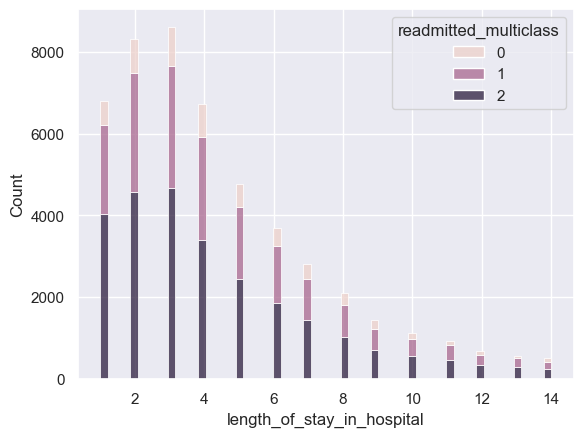

In [ ]:
sns.histplot(data = X_train, x = 'length_of_stay_in_hospital', hue = y_train, multiple = "stack")

<Axes: xlabel='length_of_stay_in_hospital', ylabel='Count'>

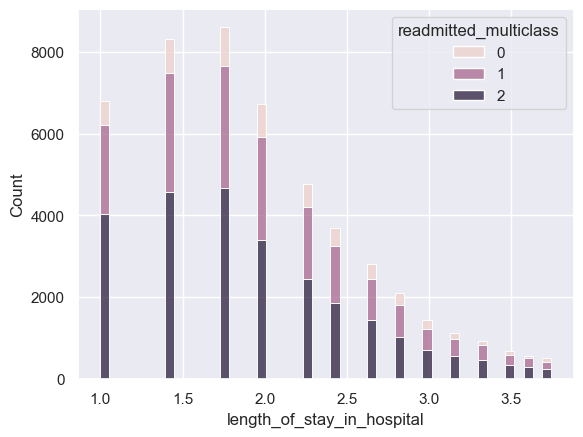

In [ ]:
sns.histplot(data = X_train, x = np.sqrt(X_train['length_of_stay_in_hospital']), hue = y_train, multiple = "stack")

<Axes: xlabel='length_of_stay_in_hospital', ylabel='Count'>

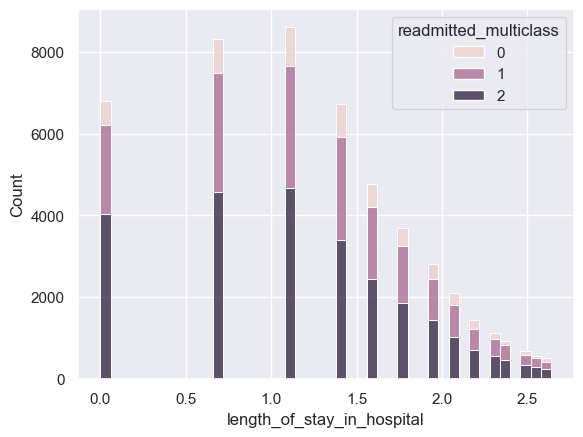

In [ ]:
sns.histplot(data = X_train, x = np.log(X_train['length_of_stay_in_hospital']), hue = y_train, multiple = "stack")

In [ ]:
X_train['length_of_stay_in_hospital'] = np.log(X_train['length_of_stay_in_hospital'])
X_val['length_of_stay_in_hospital'] = np.log(X_val['length_of_stay_in_hospital'])

**number_of_medications - sqrt**

<Axes: xlabel='number_of_medications', ylabel='Count'>

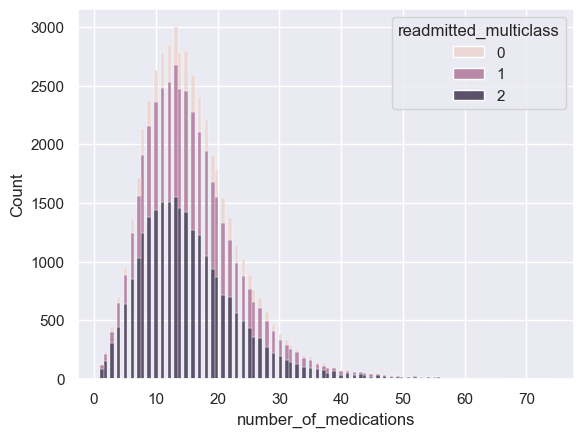

In [ ]:
sns.histplot(data = X_train, x = 'number_of_medications', hue = y_train, multiple = "stack")

<Axes: xlabel='number_of_medications', ylabel='Count'>

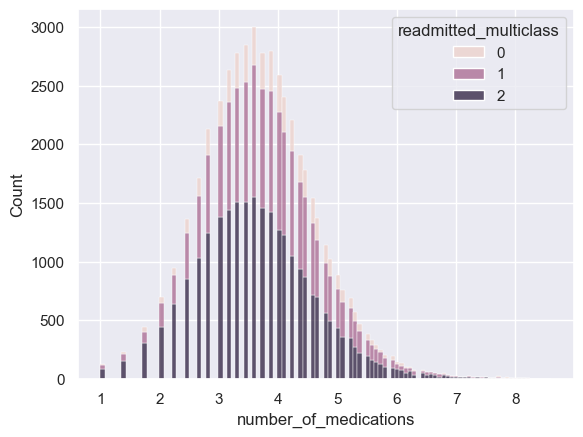

In [ ]:
sns.histplot(data = X_train, x = np.sqrt(X_train['number_of_medications']), hue = y_train, multiple = "stack")

<Axes: xlabel='number_of_medications', ylabel='Count'>

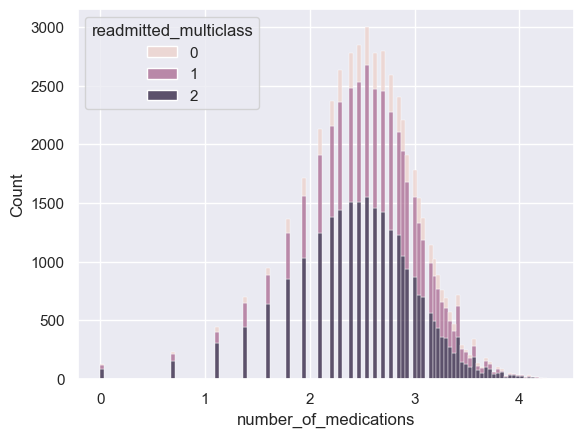

In [ ]:
sns.histplot(data = X_train, x = np.log(X_train['number_of_medications']), hue = y_train, multiple = "stack")

In [ ]:
X_train['number_of_medications'] = np.sqrt(X_train['number_of_medications'])
X_val['number_of_medications'] = np.sqrt(X_val['number_of_medications'])

**outpatient_visits_in_previous_year - sqrt**

<Axes: xlabel='outpatient_visits_in_previous_year', ylabel='Count'>

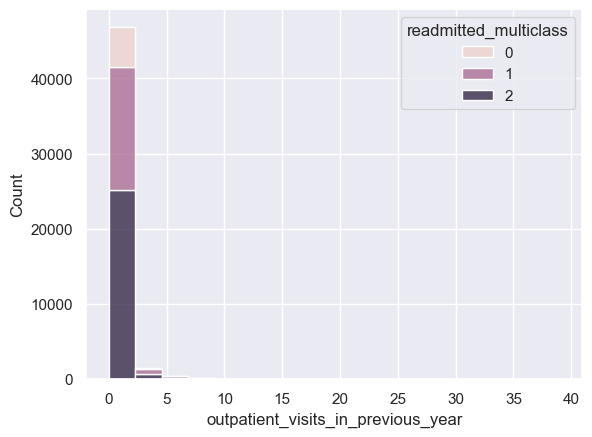

In [ ]:
sns.histplot(data = X_train, x = 'outpatient_visits_in_previous_year', hue = y_train, multiple = "stack")

<Axes: xlabel='outpatient_visits_in_previous_year', ylabel='Count'>

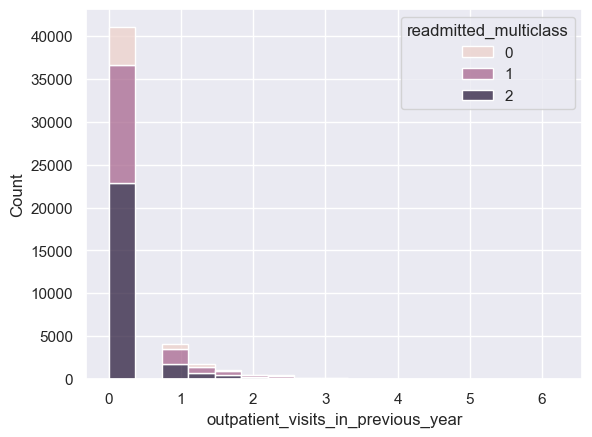

In [ ]:
sns.histplot(data = X_train, x = np.sqrt(X_train['outpatient_visits_in_previous_year']), hue = y_train, multiple = "stack")

In [ ]:
X_train['outpatient_visits_in_previous_year'] = np.sqrt(X_train['outpatient_visits_in_previous_year'])
X_val['outpatient_visits_in_previous_year'] = np.sqrt(X_val['outpatient_visits_in_previous_year'])

**inpatient_visits_in_previous_year - sqrt**

<Axes: xlabel='inpatient_visits_in_previous_year', ylabel='Count'>

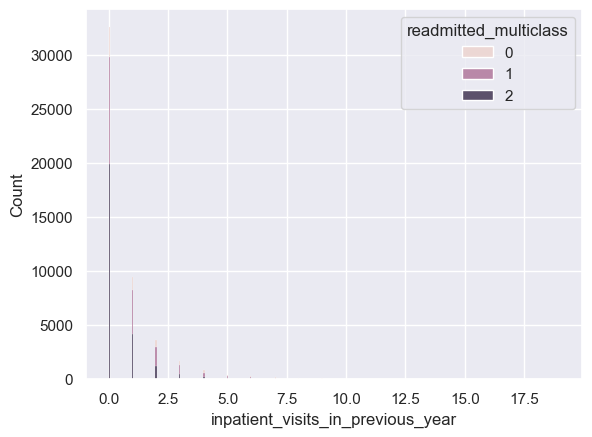

In [ ]:
sns.histplot(data = X_train, x = 'inpatient_visits_in_previous_year', hue = y_train, multiple = "stack")

<Axes: xlabel='inpatient_visits_in_previous_year', ylabel='Count'>

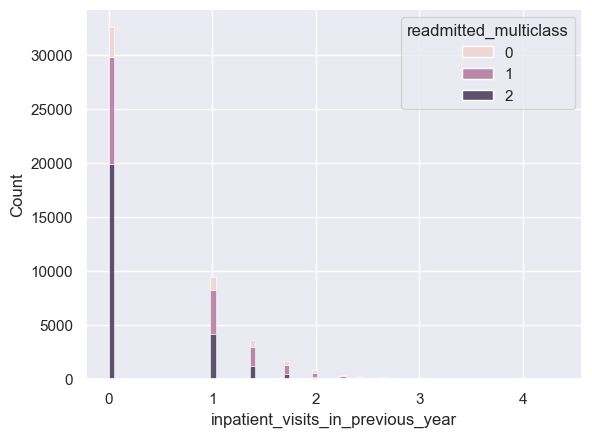

In [ ]:
sns.histplot(data = X_train, x = np.sqrt(X_train['inpatient_visits_in_previous_year']), hue = y_train, multiple = "stack")

In [ ]:
X_train['inpatient_visits_in_previous_year'] = np.sqrt(X_train['inpatient_visits_in_previous_year'])
X_val['inpatient_visits_in_previous_year'] = np.sqrt(X_val['inpatient_visits_in_previous_year'])

**emergency_visits_in_previous_year - sqrt**

<Axes: xlabel='emergency_visits_in_previous_year', ylabel='Count'>

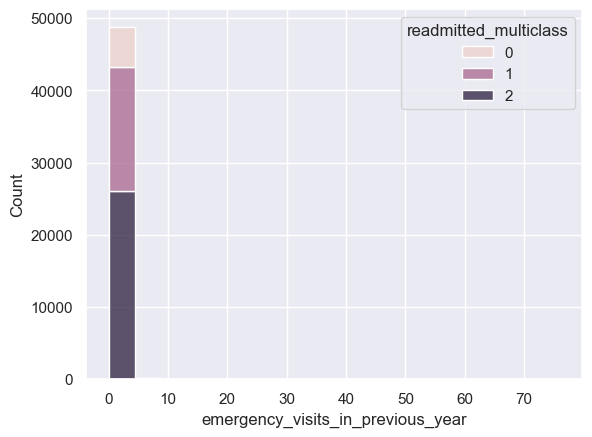

In [ ]:
sns.histplot(data = X_train, x = 'emergency_visits_in_previous_year', hue = y_train, multiple = "stack")

<Axes: xlabel='emergency_visits_in_previous_year', ylabel='Count'>

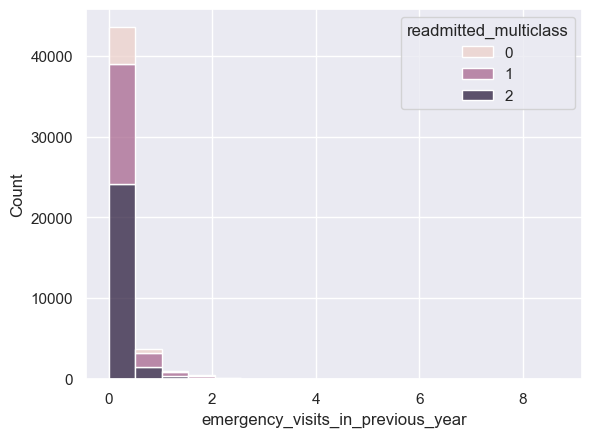

In [ ]:
sns.histplot(data = X_train, x = np.sqrt(X_train['emergency_visits_in_previous_year']), hue = y_train, multiple = "stack")

In [ ]:
X_train['emergency_visits_in_previous_year'] = np.sqrt(X_train['emergency_visits_in_previous_year'])
X_val['emergency_visits_in_previous_year'] = np.sqrt(X_val['emergency_visits_in_previous_year'])

**number_lab_tests**

<Axes: xlabel='number_lab_tests', ylabel='Count'>

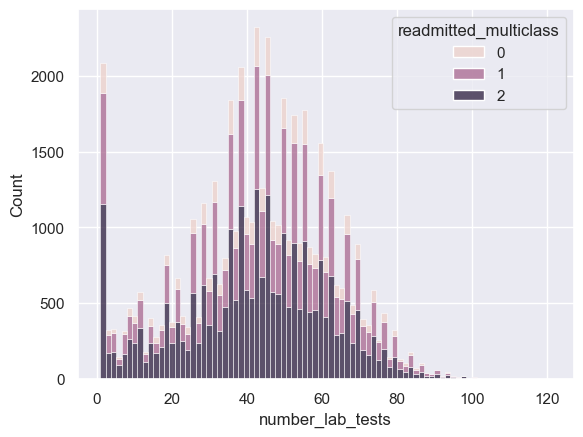

In [ ]:
sns.histplot(data = X_train, x = 'number_lab_tests', hue = y_train, multiple = "stack")

**non_lab_procedures - sqrt**

<Axes: xlabel='non_lab_procedures', ylabel='Count'>

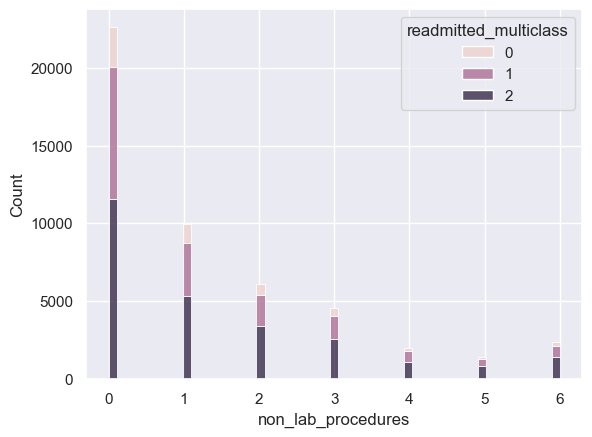

In [ ]:
sns.histplot(data = X_train, x = 'non_lab_procedures', hue = y_train, multiple = "stack")

<Axes: xlabel='non_lab_procedures', ylabel='Count'>

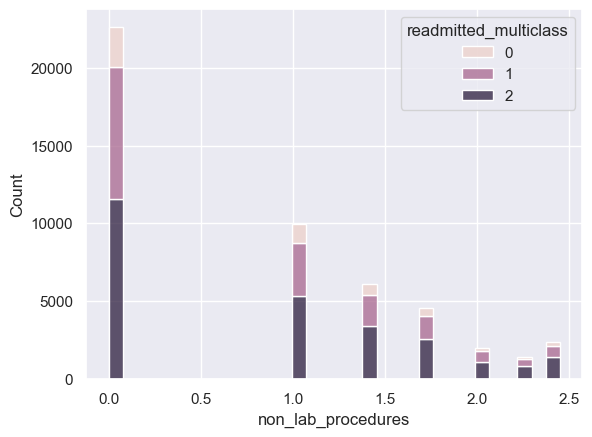

In [ ]:
sns.histplot(data = X_train, x = np.sqrt(X_train['non_lab_procedures']), hue = y_train, multiple = "stack")

In [ ]:
X_train['non_lab_procedures'] = np.sqrt(X_train['non_lab_procedures'])
X_val['non_lab_procedures'] = np.sqrt(X_val['non_lab_procedures'])

**number_diagnoses - log**

<Axes: xlabel='number_diagnoses', ylabel='Count'>

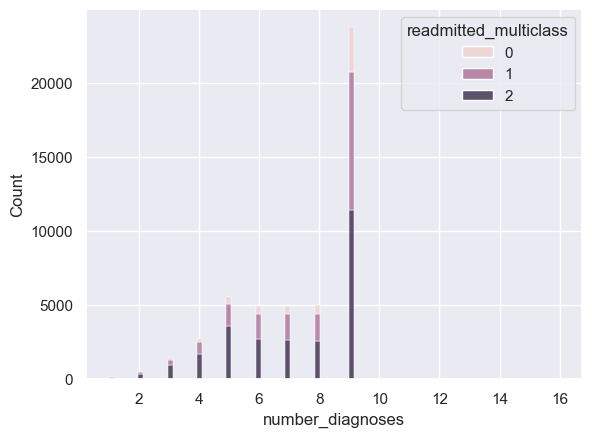

In [ ]:
sns.histplot(data = X_train, x = 'number_diagnoses', hue = y_train, multiple = "stack")

<Axes: xlabel='number_diagnoses', ylabel='Count'>

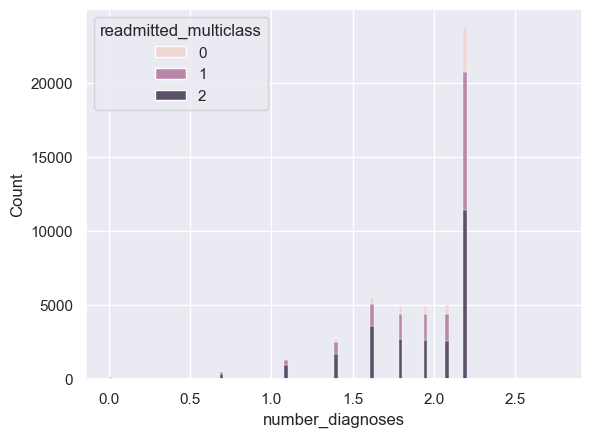

In [ ]:
sns.histplot(data = X_train, x = np.log(X_train['number_diagnoses']), hue = y_train, multiple = "stack")

<Axes: xlabel='number_diagnoses', ylabel='Count'>

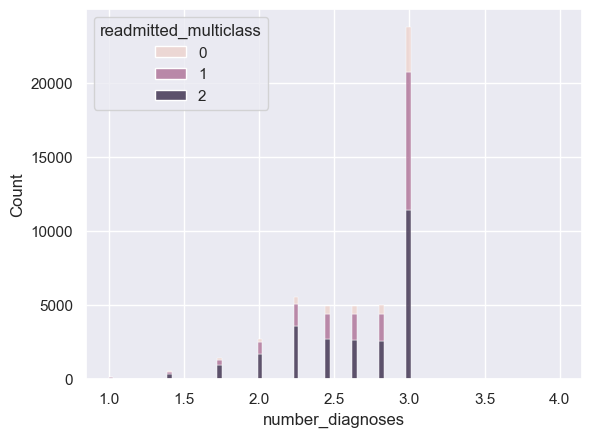

In [ ]:
sns.histplot(data = X_train, x = np.sqrt(X_train['number_diagnoses']), hue = y_train, multiple = "stack")

In [ ]:
X_train['number_diagnoses'] = np.log(X_train['number_diagnoses'])
X_val['number_diagnoses'] = np.log(X_val['number_diagnoses'])

<br>

In [ ]:
X_train.drop(['primary_diagnosis', 'secondary_diagnosis', 'additional_diagnosis'], axis=1, inplace=True)
X_val.drop(['primary_diagnosis', 'secondary_diagnosis', 'additional_diagnosis'], axis=1, inplace=True)

In [ ]:
for column in X_train.columns:
    if X_train[column].nunique() == 2:
        print(f"Variable '{column}' has just 2 categories.")

Variable 'change_in_meds_during_hospitalization' has just 2 categories.
Variable 'prescribed_diabetes_meds' has just 2 categories.
Variable 'type2' has just 2 categories.
Variable 'diagnosed_diabetes' has just 2 categories.
Variable 'admitted_urgent/emergency' has just 2 categories.
Variable 'Female' has just 2 categories.


In [ ]:
metric_features = metric_features + ['total_visits_in_previous_year', "age", 'encounter_count']
non_metric_features.remove("age")

In [ ]:
non_metric_features = non_metric_features + ['primary_diagnoses_categories', 'secondary_diagnoses_categories',
       'additional_diagnoses_categories', 'type2', 'diagnosed_diabetes', 'Female', 'admitted_urgent/emergency']

binary = ['Female', 'change_in_meds_during_hospitalization', 'prescribed_diabetes_meds', 'type2',  'diagnosed_diabetes', 'admitted_urgent/emergency']

In [ ]:
features_to_remove = ['primary_diagnosis', 'secondary_diagnosis', 'additional_diagnosis']

for feature in features_to_remove:
    non_metric_features.remove(feature)

In [ ]:
non_metric_features_wout_binary = [feature for feature in non_metric_features if feature not in binary]

In [ ]:
all_features_wout_binary = non_metric_features_wout_binary + metric_features

## 2.6. **Scalling** <a class="anchor" id="section2.6">

In [ ]:
X_train_unscalled = X_train.copy()

In [ ]:
# Target encoding for Train and Validation
encoder = ce.TargetEncoder(handle_missing = 'return_nan')

# Iterate through the non-metric features
for column in non_metric_features_wout_binary:
    encoder.fit(X_train[[column]], y_train)

    X_train[column] = encoder.transform(X_train[[column]])
    X_val[column] = encoder.transform(X_val[[column]])

In [ ]:
scaler = MinMaxScaler()

# Iterate through the metric features
for column in all_features_wout_binary:
    scaler.fit(X_train[[column]])

    X_train[column] = scaler.transform(X_train[[column]])
    X_val[column] = scaler.transform(X_val[[column]])

In [ ]:
pd.concat([ X_train.min().round(3), X_train.max().round(1)], axis = 1, keys = ['Minimum Value', 'Maximum Value'])

,Minimum Value,Maximum Value
country,0.0,0.0
race,0.0,1.0
age,0.0,1.0
weight,0.0,1.0
payer_code,0.0,1.0
outpatient_visits_in_previous_year,0.0,1.0
emergency_visits_in_previous_year,0.0,1.0
inpatient_visits_in_previous_year,0.0,1.0
admission_type,0.0,1.0
medical_specialty,0.0,1.0


## 2.7. **Missing Values Treatment** <a class="anchor" id="section2.7">




In [ ]:
train_mv_knn = X_train.copy()
val_mv_knn = X_val.copy()

In [ ]:
# Drop columns that have really high percentage of missing values (> 50%)
train_mv_knn.drop(["weight"], axis=1, inplace=True)
val_mv_knn.drop(["weight"], axis=1, inplace=True)

non_metric_features.remove("weight")
non_metric_features_wout_binary.remove('weight')

### 2.7.1. **Missing Values Treatment - Train** <a class="anchor" id="section2.7.1">

In [ ]:
knn_imputer = KNNImputer(n_neighbors = 3)

train_mv_knn = pd.DataFrame(knn_imputer.fit_transform(train_mv_knn), columns=train_mv_knn.columns)

In [ ]:
train_mv_knn.isna().sum() * 100

country                                  0
race                                     0
age                                      0
payer_code                               0
outpatient_visits_in_previous_year       0
emergency_visits_in_previous_year        0
inpatient_visits_in_previous_year        0
admission_type                           0
medical_specialty                        0
average_pulse_bpm                        0
discharge_disposition                    0
admission_source                         0
length_of_stay_in_hospital               0
number_lab_tests                         0
non_lab_procedures                       0
number_of_medications                    0
number_diagnoses                         0
glucose_test_result                      0
a1c_test_result                          0
change_in_meds_during_hospitalization    0
prescribed_diabetes_meds                 0
medication                               0
total_visits_in_previous_year            0
primary_dia

### 2.7.2. **Missing Values Treatment - Validation** <a class="anchor" id="section2.7.2">

In [ ]:
val_mv_knn = pd.DataFrame(knn_imputer.transform(val_mv_knn), columns = val_mv_knn.columns)

In [ ]:
val_mv_knn.isna().sum() * 100

country                                  0
race                                     0
age                                      0
payer_code                               0
outpatient_visits_in_previous_year       0
emergency_visits_in_previous_year        0
inpatient_visits_in_previous_year        0
admission_type                           0
medical_specialty                        0
average_pulse_bpm                        0
discharge_disposition                    0
admission_source                         0
length_of_stay_in_hospital               0
number_lab_tests                         0
non_lab_procedures                       0
number_of_medications                    0
number_diagnoses                         0
glucose_test_result                      0
a1c_test_result                          0
change_in_meds_during_hospitalization    0
prescribed_diabetes_meds                 0
medication                               0
total_visits_in_previous_year            0
primary_dia

In [ ]:
X_train = train_mv_knn.copy()
X_val = val_mv_knn.copy()

## 2.8. **Balance Dataset** <a class="anchor" id="section2.8">

In [ ]:
sme = SMOTETomek(random_state=42)

# Fit and transform the training data using SMOTETomek
X_smote, y_smote = sme.fit_resample(X_train, y_train)

In [ ]:
y_smote.value_counts()

readmitted_multiclass
0    25997
1    24470
2    24451
Name: count, dtype: int64

# 3. **Feature Selection** <a class="anchor" id="section3">

## 3.1. Filter Methods <a class="anchor" id="section3.1">

**Features' Variance**

In [ ]:
# Univariate variables: Check the variance of each feature identify those with no variability.
# Features with no variance (i.e., constant values) should be removed.
variance_values = X_smote.var().round(10)*100
print(variance_values)

country                                   0.000000
race                                      3.517719
age                                       2.836145
payer_code                               11.063619
outpatient_visits_in_previous_year        0.737048
emergency_visits_in_previous_year         0.238788
inpatient_visits_in_previous_year         2.564934
admission_type                            5.222331
medical_specialty                         1.174662
average_pulse_bpm                         7.986925
discharge_disposition                     7.324324
admission_source                          7.288203
length_of_stay_in_hospital                6.615509
number_lab_tests                          2.377302
non_lab_procedures                       10.831756
number_of_medications                     1.481855
number_diagnoses                          1.227593
glucose_test_result                       1.195503
a1c_test_result                           9.084055
change_in_meds_during_hospitali

In [ ]:
for threshold in [0.1]:
    low_variance_features = variance_values[variance_values < threshold].index
    print(f"Threshold: {threshold}, Low-variance features: {low_variance_features}")

Threshold: 0.1, Low-variance features: Index(['country', 'total_visits_in_previous_year'], dtype='object')


In [ ]:
variance_eliminate = ['total_visits_in_previous_year', 'country' ]

In [ ]:
# Drop the column country because it has only one value, so it won´t give use any valuable insights
X_smote.drop("country", axis = 1, inplace= True)
X_val.drop("country", axis = 1, inplace= True)
X_train.drop("country", axis = 1, inplace= True)

non_metric_features.remove('country')

**Correlation Matrices**

In [ ]:
X_smote[metric_features].columns

Index(['outpatient_visits_in_previous_year',
       'emergency_visits_in_previous_year',
       'inpatient_visits_in_previous_year', 'average_pulse_bpm',
       'length_of_stay_in_hospital', 'number_lab_tests', 'non_lab_procedures',
       'number_of_medications', 'number_diagnoses',
       'total_visits_in_previous_year', 'age', 'encounter_count'],
      dtype='object')

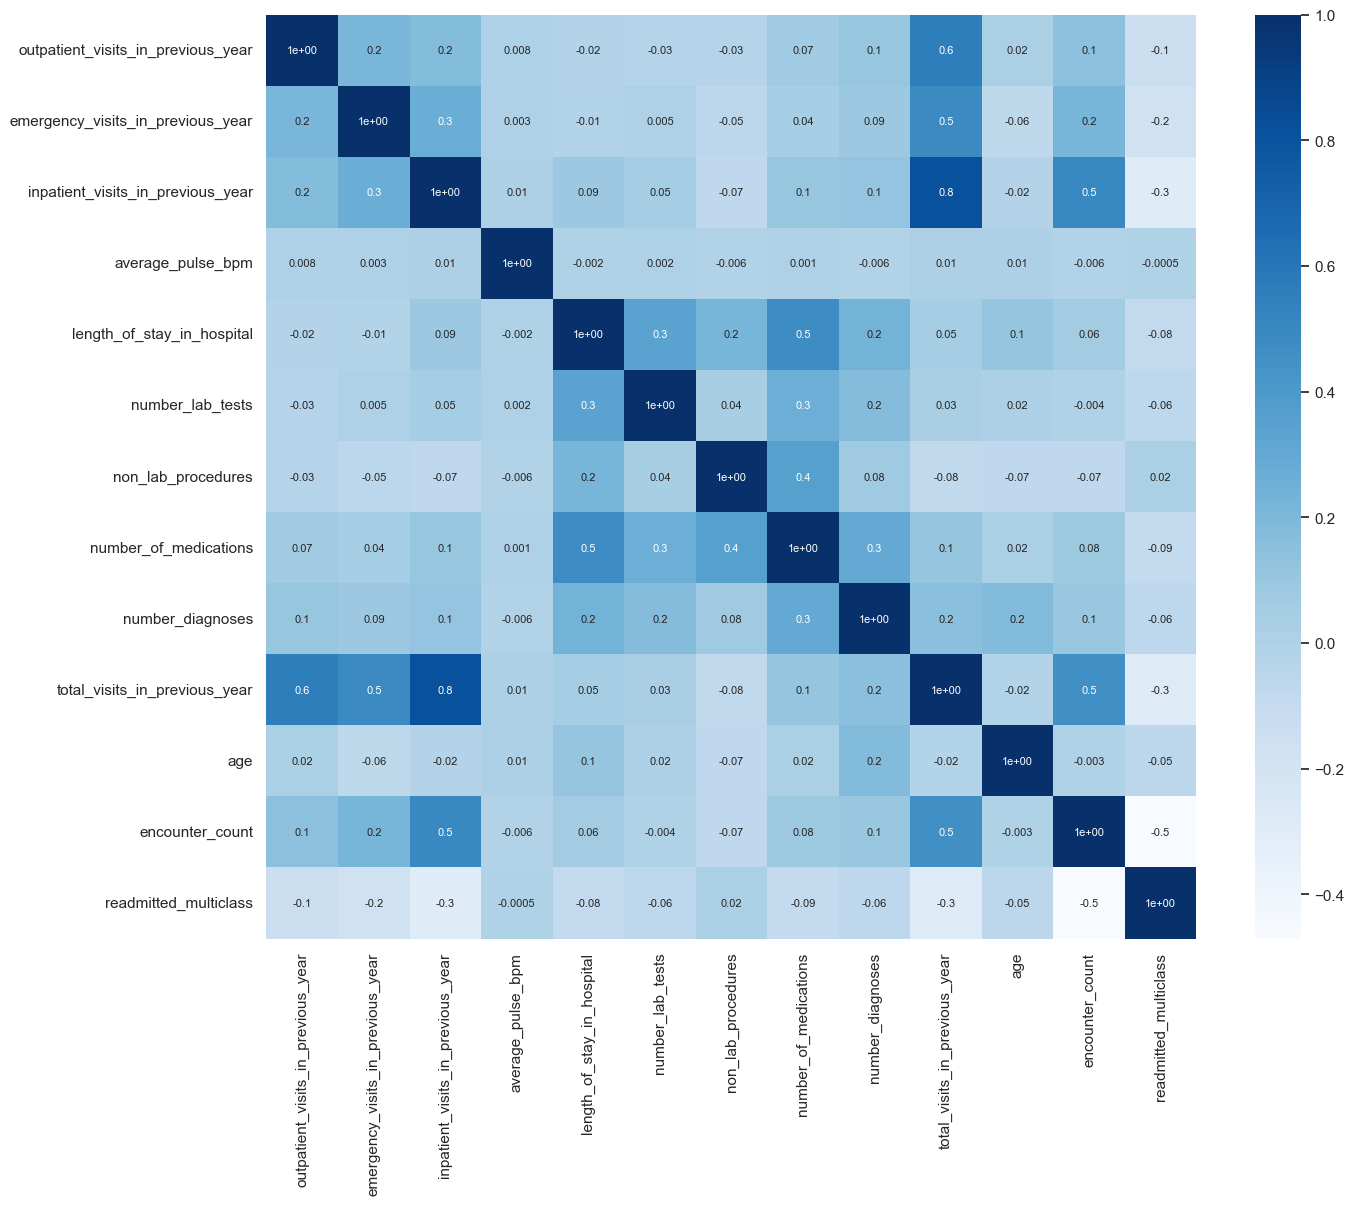

In [ ]:
def cor_heatmap(cor):
    plt.figure(figsize=(15,12))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Blues, fmt='.1', annot_kws = {"size": 8})
    plt.show()

# Check Spearman Correlation
correlation_features = pd.concat([X_smote[metric_features], y_smote], axis=1)
cor_spearman = correlation_features.corr(method ='spearman')

cor_heatmap(cor_spearman)

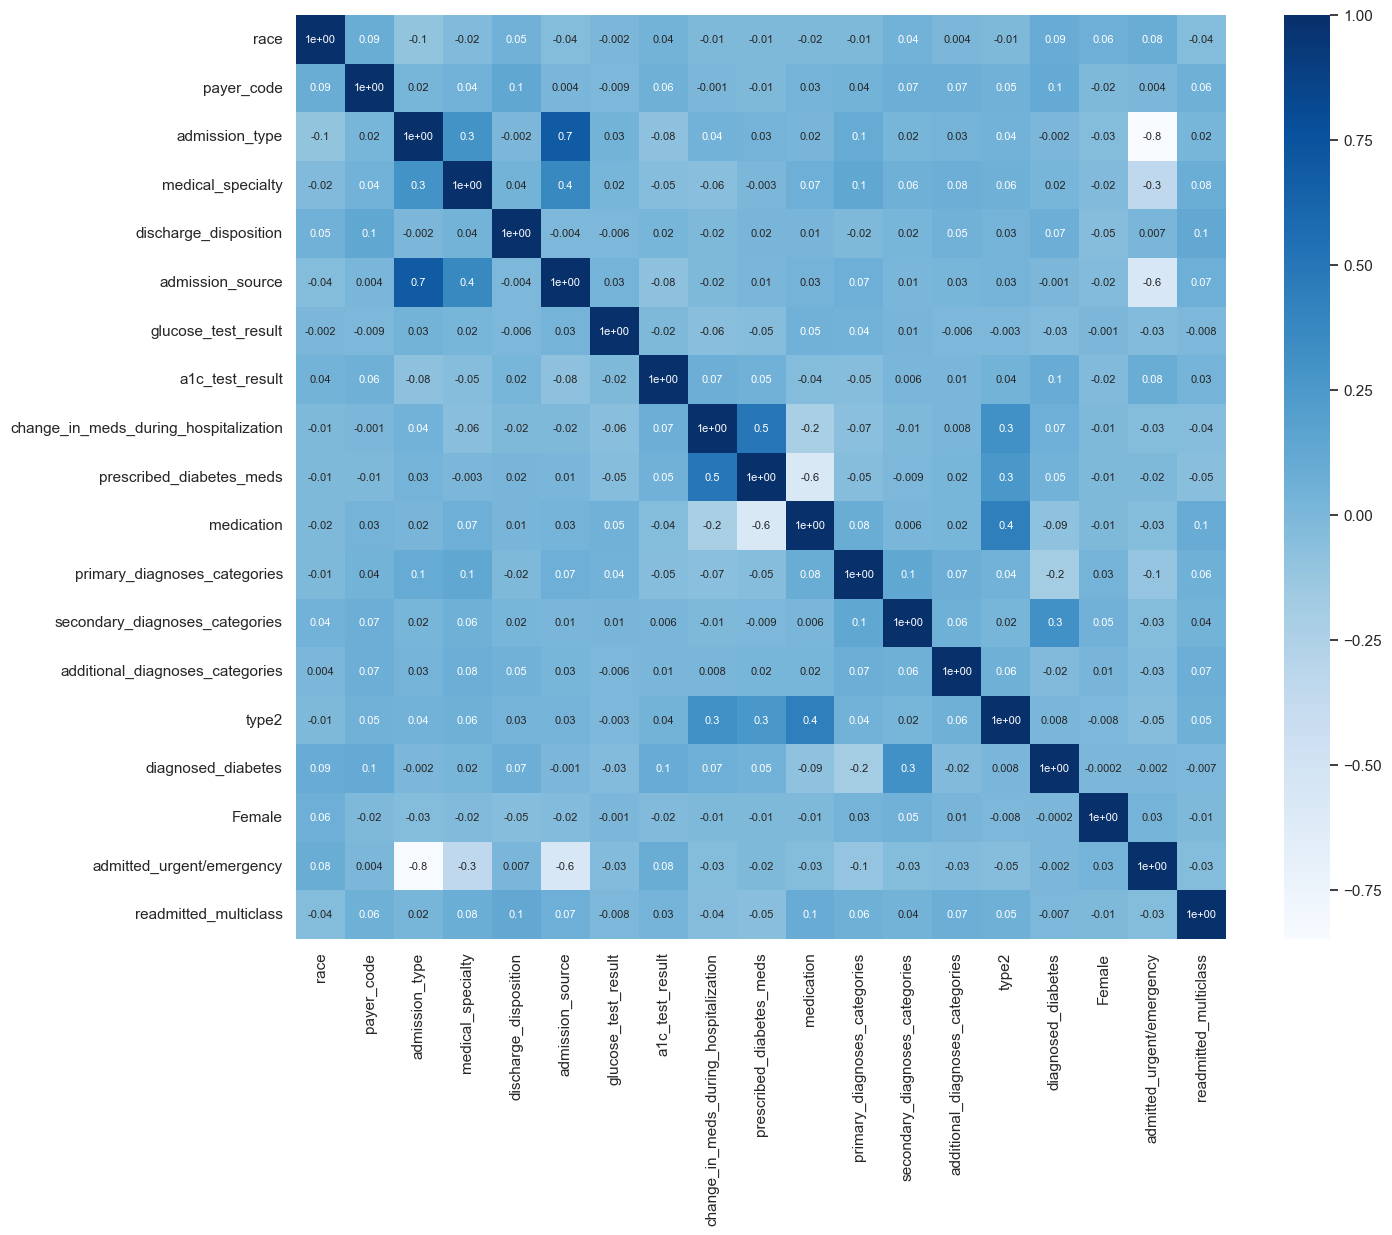

In [ ]:
def cor_heatmap(cor):
    plt.figure(figsize=(15,12))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Blues, fmt='.1', annot_kws = {"size": 8})
    plt.show()

# Check Spearman Correlation
correlation_features = pd.concat([X_smote[non_metric_features], y_smote], axis=1)
cor_spearman = correlation_features.corr(method ='spearman')

cor_heatmap(cor_spearman)

In [ ]:
# Variables with a correlation with the target bellow |0.05| and variales with a correlation above |0.8| between the independent variables

spearman_eliminate = ['total_visits_in_previous_year','race', 'admission_type','average_pulse_bpm' , 'non_lab_procedures', 'glucose_test_result',
                      'a1c_test_result', 'change_in_meds_during_hospitalization','secondary_diagnoses_categories', 'diagnosed_diabetes', 'Female',
                      'admitted_urgent/emergency' ]

**Chi-Square** for Categorical Features

In [ ]:
chi_square_eliminate = []

def TestIndependence(X,y,var,alpha=0.05):
    dfObserved = pd.crosstab(y,X)
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
        chi_square_eliminate.append(var)
    print(result)

for var in non_metric_features:
    TestIndependence(X_smote[var], y_smote, var)

race is IMPORTANT for Prediction
payer_code is IMPORTANT for Prediction
admission_type is IMPORTANT for Prediction
medical_specialty is IMPORTANT for Prediction
discharge_disposition is IMPORTANT for Prediction
admission_source is IMPORTANT for Prediction
glucose_test_result is IMPORTANT for Prediction
a1c_test_result is IMPORTANT for Prediction
change_in_meds_during_hospitalization is IMPORTANT for Prediction
prescribed_diabetes_meds is IMPORTANT for Prediction
medication is IMPORTANT for Prediction
primary_diagnoses_categories is IMPORTANT for Prediction
secondary_diagnoses_categories is IMPORTANT for Prediction
additional_diagnoses_categories is IMPORTANT for Prediction
type2 is IMPORTANT for Prediction
diagnosed_diabetes is NOT an important predictor. (Discard diagnosed_diabetes from model)
Female is IMPORTANT for Prediction
admitted_urgent/emergency is IMPORTANT for Prediction


In [ ]:
chi_square_eliminate

['diagnosed_diabetes']

## 3.2. Wrapper Methods <a class="anchor" id="section3.2">

**RFE (Recursive Feature Elimination)**

In [ ]:
len(X_train.columns)

30

In [ ]:
nof_list = np.arange(2, len(X_train.columns) + 1)
high_score = 0
nof = 0
train_score_list = []
val_score_list = []

for n in range(len(nof_list)):
    model = LogisticRegression(random_state = 42)

    rfe = RFE(estimator=model, n_features_to_select=nof_list[n])

    X_train_rfe = rfe.fit_transform(X_smote, y_smote)
    X_val_rfe = rfe.transform(X_val)

    model.fit(X_train_rfe, y_smote)

    # storing results on training data
    train_pred = model.predict(X_train_rfe)
    train_score = f1_score(y_smote, train_pred, average='weighted')
    train_score_list.append(train_score)

    # storing results on validation data
    val_pred = model.predict(X_val_rfe)
    val_score = f1_score(y_val, val_pred, average='weighted')
    val_score_list.append(val_score)

    # check best score
    if (val_score >= high_score):
        high_score = val_score
        nof = nof_list[n]

print("Optimum number of features: %d" % nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 28
Score with 28 features: 0.525289


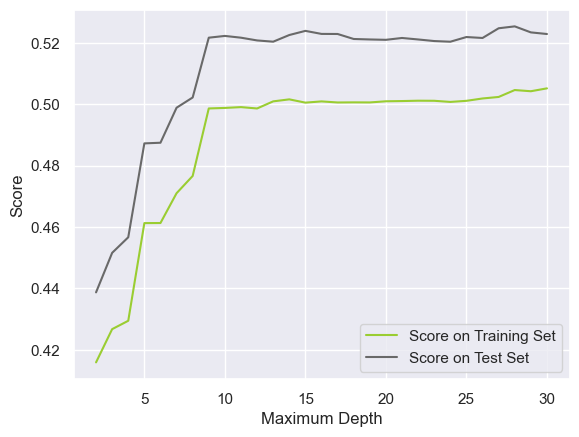

In [ ]:
plt.plot(list(range(2, len(X_train.columns) + 1)), train_score_list, label = "Score on Training Set", color = 'yellowgreen')
plt.plot(list(range(2, len(X_train.columns) + 1)), val_score_list, label="Score on Test Set", color='dimgray')
plt.xlabel("Maximum Depth")
plt.ylabel("Score")
plt.legend()
plt.show()

In [ ]:
model = LogisticRegression(random_state=42)
rfe = RFE(estimator = model, n_features_to_select = 11)

X_rfe = rfe.fit_transform(X_smote, y_smote)

In [ ]:
# Evaluate what columns should we keep based on RFE
pd.Series(rfe.support_, index = X_smote.columns)

race                                     False
age                                       True
payer_code                               False
outpatient_visits_in_previous_year        True
emergency_visits_in_previous_year         True
inpatient_visits_in_previous_year         True
admission_type                           False
medical_specialty                        False
average_pulse_bpm                        False
discharge_disposition                     True
admission_source                         False
length_of_stay_in_hospital               False
number_lab_tests                          True
non_lab_procedures                       False
number_of_medications                    False
number_diagnoses                          True
glucose_test_result                      False
a1c_test_result                          False
change_in_meds_during_hospitalization    False
prescribed_diabetes_meds                 False
medication                                True
total_visits_

In [ ]:
rfe_eliminate = []
rfe_dataset = pd.Series(rfe.support_, index = X_smote.columns)

for index, value in rfe_dataset.items():
    if not value:
        rfe_eliminate.append(index)

In [ ]:
rfe_eliminate

['race',
 'payer_code',
 'admission_type',
 'medical_specialty',
 'average_pulse_bpm',
 'admission_source',
 'length_of_stay_in_hospital',
 'non_lab_procedures',
 'number_of_medications',
 'glucose_test_result',
 'a1c_test_result',
 'change_in_meds_during_hospitalization',
 'prescribed_diabetes_meds',
 'primary_diagnoses_categories',
 'additional_diagnoses_categories',
 'type2',
 'diagnosed_diabetes',
 'admitted_urgent/emergency',
 'Female']

## 3.3. Embedded Methods <a class="anchor" id="section1">

**LASSO**

In [ ]:
# Lasso
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [ ]:
reg = LassoCV()
reg.fit(X_smote, y_smote)

coef = pd.Series(reg.coef_, index = X_smote.columns).round(6)
coef

race                                     0.056407
age                                     -0.157272
payer_code                               0.087936
outpatient_visits_in_previous_year      -0.434538
emergency_visits_in_previous_year       -0.910876
inpatient_visits_in_previous_year       -0.779140
admission_type                           0.031043
medical_specialty                        0.111593
average_pulse_bpm                        0.008127
discharge_disposition                    0.222595
admission_source                         0.117760
length_of_stay_in_hospital              -0.051522
number_lab_tests                        -0.174638
non_lab_procedures                       0.029110
number_of_medications                   -0.082260
number_diagnoses                        -0.428544
glucose_test_result                     -0.132617
a1c_test_result                          0.071643
change_in_meds_during_hospitalization    0.019634
prescribed_diabetes_meds                 0.036906


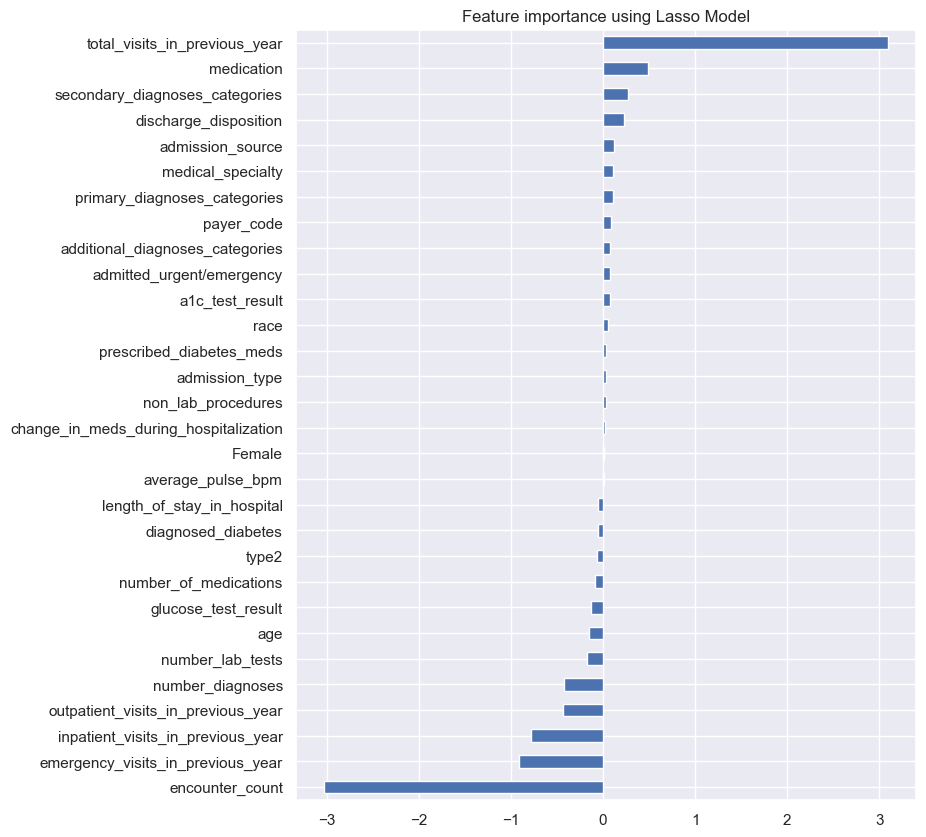

In [ ]:
plot_importance(coef,'Lasso')

In [ ]:
selected_variables = (coef >= -0.15) & (coef <= 0.15)
lasso_eliminate = coef.index[selected_variables].tolist()

print("Variables to eliminate with Lasso:", lasso_eliminate)

Variables to eliminate with Lasso: ['race', 'payer_code', 'admission_type', 'medical_specialty', 'average_pulse_bpm', 'admission_source', 'length_of_stay_in_hospital', 'non_lab_procedures', 'number_of_medications', 'glucose_test_result', 'a1c_test_result', 'change_in_meds_during_hospitalization', 'prescribed_diabetes_meds', 'primary_diagnoses_categories', 'additional_diagnoses_categories', 'type2', 'diagnosed_diabetes', 'admitted_urgent/emergency', 'Female']


**Decision Tree**

race: 0.017
age: 0.041
payer_code: 0.023
outpatient_visits_in_previous_year: 0.011
emergency_visits_in_previous_year: 0.008
inpatient_visits_in_previous_year: 0.033
admission_type: 0.013
medical_specialty: 0.055
average_pulse_bpm: 0.065
discharge_disposition: 0.02
admission_source: 0.013
length_of_stay_in_hospital: 0.043
number_lab_tests: 0.065
non_lab_procedures: 0.028
number_of_medications: 0.054
number_diagnoses: 0.039
glucose_test_result: 0.006
a1c_test_result: 0.012
change_in_meds_during_hospitalization: 0.007
prescribed_diabetes_meds: 0.004
medication: 0.038
total_visits_in_previous_year: 0.062
primary_diagnoses_categories: 0.042
secondary_diagnoses_categories: 0.042
additional_diagnoses_categories: 0.04
type2: 0.004
diagnosed_diabetes: 0.006
admitted_urgent/emergency: 0.004
encounter_count: 0.197
Female: 0.009


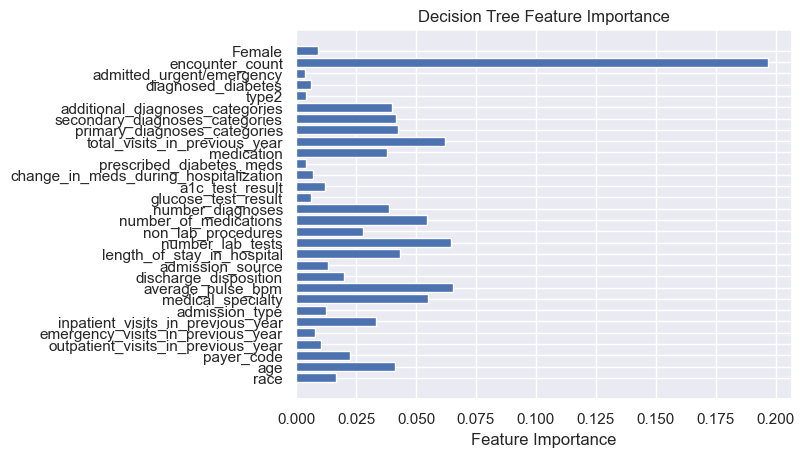

In [ ]:
clf = DecisionTreeClassifier(random_state = 42)
clf.fit(X_smote, y_smote)

# Get feature importances
feature_importances = clf.feature_importances_

decision_tree_eliminate = []

# Print feature importances
for feature, importance in zip(X_smote.columns, feature_importances):
    print(f"{feature}: {importance.round(3)}")
    if importance < 0.025:
        decision_tree_eliminate.append(feature)

plt.barh(X_smote.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importance')
plt.show()

In [ ]:
decision_tree_eliminate

['race',
 'payer_code',
 'outpatient_visits_in_previous_year',
 'emergency_visits_in_previous_year',
 'admission_type',
 'discharge_disposition',
 'admission_source',
 'glucose_test_result',
 'a1c_test_result',
 'change_in_meds_during_hospitalization',
 'prescribed_diabetes_meds',
 'type2',
 'diagnosed_diabetes',
 'admitted_urgent/emergency',
 'Female']

## 3.4. **Final Selection** <a class="anchor" id="section3.4">

In [ ]:
# Combine all the lists into one list
all_eliminate = (
    variance_eliminate
    + spearman_eliminate
    + chi_square_eliminate
    + rfe_eliminate
    + lasso_eliminate
    + decision_tree_eliminate)

element_counts = Counter(all_eliminate)

# Specify the minimum number of lists an element should appear in
min_appearances = 3

common_elements = [element for element, count in element_counts.items() if count >= min_appearances]
print(common_elements)

['race', 'admission_type', 'average_pulse_bpm', 'non_lab_procedures', 'glucose_test_result', 'a1c_test_result', 'change_in_meds_during_hospitalization', 'diagnosed_diabetes', 'Female', 'admitted_urgent/emergency', 'payer_code', 'admission_source', 'prescribed_diabetes_meds', 'type2']


In [ ]:
X_train.drop(common_elements, axis=1, inplace=True)
X_val.drop(common_elements, axis=1, inplace=True)
X_smote.drop(common_elements, axis=1, inplace=True)

# ['glucose_test_result', 'diagnosed_diabetes', 'race', 'payer_code', 'admission_type', 'a1c_test_result', 'change_in_meds_during_hospitalization',
# 'prescribed_diabetes_meds', 'type2', 'Female', 'admitted_urgent/emergency']

In [ ]:
len(X_smote.columns)

16

In [ ]:
X_smote.columns

Index(['age', 'outpatient_visits_in_previous_year',
       'emergency_visits_in_previous_year',
       'inpatient_visits_in_previous_year', 'medical_specialty',
       'discharge_disposition', 'length_of_stay_in_hospital',
       'number_lab_tests', 'number_of_medications', 'number_diagnoses',
       'medication', 'total_visits_in_previous_year',
       'primary_diagnoses_categories', 'secondary_diagnoses_categories',
       'additional_diagnoses_categories', 'encounter_count'],
      dtype='object')

# 4. **Predictive Modelling** <a class="anchor" id="section4">

In [ ]:
# Confusion Matrix and Model Assessment Metrics
def metrics(y_train, pred_train, y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                TRAIN                                                      ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))

    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))

In [ ]:
# Calculates the average f1 scores with the KFOLD
def avg_score(model, X, y):
    skf = StratifiedKFold(n_splits = 5)
    f1_train = []
    f1_val = []

    for train_index, val_index in skf.split(X, y):
        # fit the model to the data
        model.fit(X, y)

        # obtain predictions for train and validation sets
        y_train_pred = model.predict(X)
        y_val_pred = model.predict(X_val)

        # calculate F1 score for train and validation sets
        f1_train.append(f1_score(y, y_train_pred, average='weighted'))
        f1_val.append(f1_score(y_val, y_val_pred, average='weighted'))

    # calculate the average and the std for each measure (F1 score, time)
    avg_f1_train = round(np.mean(f1_train), 3)
    avg_f1_val = round(np.mean(f1_val), 3)
    std_f1_train = round(np.std(f1_train), 2)
    std_f1_val = round(np.std(f1_val), 2)

    return str(avg_f1_train) + '+/-' + str(std_f1_train), \
           str(avg_f1_val) + '+/-' + str(std_f1_val)

def show_results(df, X, y, *args):
    count = 0
    for arg in args:
        avg_f1_train, avg_f1_val = avg_score(arg, X, y)
        df.iloc[count] = avg_f1_train, avg_f1_val
        count += 1
    return df

## 4.1. **Logistic Regression** <a class="anchor" id="section4.1">

In [ ]:
# CLASS_WEIGHTS
log_model_gs = LogisticRegression(C = 172.79373898388363, class_weight = 'balanced', max_iter = 100, multi_class = 'multinomial', n_jobs = -1,
                                  penalty = None, solver = 'sag').fit(X_train, y_train)

log_pred_train_gs = log_model_gs.predict(X_train)
log_pred_val_gs = log_model_gs.predict(X_val)

# Assess Model's Performance
metrics(y_train, log_pred_train_gs, y_val, log_pred_val_gs)

print('f1_train:', f1_score(y_train, log_pred_train_gs, average='weighted').round(2))
print('f1_val:', f1_score(y_val, log_pred_val_gs, average='weighted').round(2))

___________________________________________________________________________________________________________
                                                TRAIN                                                      
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.24      0.39      0.29      5565
           1       0.59      0.33      0.42     17416
           2       0.70      0.81      0.75     26084

    accuracy                           0.59     49065
   macro avg       0.51      0.51      0.49     49065
weighted avg       0.61      0.59      0.58     49065

[[ 2158  1538  1869]
 [ 4448  5688  7280]
 [ 2469  2481 21134]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------

In [ ]:
# Calculate the average f1_score with KFOLD (K = 5)
df_log = pd.DataFrame(columns = ['Train','Validation'], index = ['class_weight = balanced'])
show_results(df_log, X_train, y_train, log_model_gs)

,Train,Validation
class_weight = balanced,0.581+/-0.0,0.533+/-0.0


In [ ]:
# SMOTE
log_model_gs = LogisticRegression(C = 172.79373898388363, max_iter = 100, multi_class = 'multinomial', n_jobs = -1, penalty = None,
                                  solver = 'sag').fit(X_smote, y_smote)

log_pred_train_gs = log_model_gs.predict(X_smote)
log_pred_val_gs = log_model_gs.predict(X_val)

# Assess Model's Performance
metrics(y_smote, log_pred_train_gs, y_val, log_pred_val_gs)

print('f1_train:', f1_score(y_smote, log_pred_train_gs, average='weighted').round(2))
print('f1_val:', f1_score(y_val, log_pred_val_gs, average='weighted').round(2))

___________________________________________________________________________________________________________
                                                TRAIN                                                      
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.54      0.45      0.49     25997
           1       0.46      0.30      0.36     24470
           2       0.53      0.82      0.65     24451

    accuracy                           0.52     74918
   macro avg       0.51      0.52      0.50     74918
weighted avg       0.51      0.52      0.50     74918

[[11663  6743  7591]
 [ 7273  7298  9899]
 [ 2654  1823 19974]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------

## 4.2. **Naive Bayes** <a class="anchor" id="section4.2">

In [ ]:
modelCNB = ComplementNB(alpha= 0.001, fit_prior=True, norm=False)
modelCNB.fit(X_smote, y_smote)

NB_pred_train = modelCNB.predict(X_smote)
NB_pred_val = modelCNB.predict(X_val)

# Assess Model's Performance
metrics(y_smote, NB_pred_train, y_val, NB_pred_val)

print('f1_train:', f1_score(y_smote, NB_pred_train, average='weighted').round(2))
print('f1_val:', f1_score(y_val, NB_pred_val, average='weighted').round(2))

___________________________________________________________________________________________________________
                                                TRAIN                                                      
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.48      0.51      0.49     25997
           1       0.44      0.07      0.12     24470
           2       0.44      0.77      0.56     24451

    accuracy                           0.45     74918
   macro avg       0.45      0.45      0.39     74918
weighted avg       0.45      0.45      0.39     74918

[[13317  1060 11620]
 [10037  1622 12811]
 [ 4532   999 18920]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------

In [ ]:
# Calculate the average f1_score with KFOLD (K = 5)
df_nb = pd.DataFrame(columns = ['Train','Validation'], index = ['smote'])
show_results(df_nb, X_smote, y_smote, modelCNB)

,Train,Validation
smote,0.391+/-0.0,0.44+/-0.0


In [ ]:
modelCNB = ComplementNB(alpha= 40, fit_prior=True, norm=False)
modelCNB.fit(X_train, y_train)

NB_pred_train = modelCNB.predict(X_train)
NB_pred_val = modelCNB.predict(X_val)

# Assess Model's Performance
metrics(y_train, NB_pred_train, y_val, NB_pred_val)

print('f1_train:', f1_score(y_train, NB_pred_train, average='weighted').round(2))
print('f1_val:', f1_score(y_val, NB_pred_val, average='weighted').round(2))

___________________________________________________________________________________________________________
                                                TRAIN                                                      
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.17      0.02      0.04      5565
           1       0.49      0.47      0.48     17416
           2       0.64      0.77      0.70     26084

    accuracy                           0.58     49065
   macro avg       0.43      0.42      0.40     49065
weighted avg       0.53      0.58      0.54     49065

[[  116  2974  2475]
 [  187  8203  9026]
 [  386  5633 20065]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------

In [ ]:
# Calculate the average f1_score with KFOLD (K = 5)
df_nb = pd.DataFrame(columns = ['Train','Validation'], index = ['smote'])
show_results(df_nb, X_train, y_train, modelCNB)

,Train,Validation
smote,0.544+/-0.0,0.534+/-0.0


### 4.3. **KNN** <a class="anchor" id="section4.3">

In [ ]:
modelKNN = KNeighborsClassifier(weights = 'distance', p = 1, n_neighbors = 19)
modelKNN.fit(X_smote, y_smote)

KNN_pred_train = modelKNN.predict(X_smote)
KNN_pred_val = modelKNN.predict(X_val)

# Assess Model's Performance
metrics(y_smote, KNN_pred_train, y_val, KNN_pred_val)

print('f1_train:', f1_score(y_smote, KNN_pred_train, average='weighted').round(2))
print('f1_val:', f1_score(y_val, KNN_pred_val, average='weighted').round(2))

___________________________________________________________________________________________________________
                                                TRAIN                                                      
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25997
           1       1.00      1.00      1.00     24470
           2       1.00      1.00      1.00     24451

    accuracy                           1.00     74918
   macro avg       1.00      1.00      1.00     74918
weighted avg       1.00      1.00      1.00     74918

[[25997     0     0]
 [    0 24470     0]
 [    0     1 24450]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------

In [ ]:
# Calculate the average f1_score with KFOLD (K = 5)
df_knn = pd.DataFrame(columns = ['Train','Validation'], index = ['smote'])
show_results(df_knn, X_smote, y_smote, modelKNN)

,Train,Validation
smote,1.0+/-0.0,0.51+/-0.0


### 4.4. **MLP** <a class="anchor" id="section4.4">

In [ ]:
MLPmodel = MLPClassifier(activation = 'tanh', batch_size = 50, hidden_layer_sizes = (15, 10, 15), learning_rate = 'adaptive', solver = 'adam')
MLPmodel.fit(X_smote, y_smote)

MLP_pred_train = MLPmodel.predict(X_smote)
MLP_pred_val = MLPmodel.predict(X_val)

# Assess Model's Performance
metrics(y_smote, MLP_pred_train, y_val, MLP_pred_val)

print('f1_train:', f1_score(y_smote, MLP_pred_train, average='weighted').round(2))
print('f1_val:', f1_score(y_val, MLP_pred_val, average='weighted').round(2))

___________________________________________________________________________________________________________
                                                TRAIN                                                      
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.66      0.62      0.64     25997
           1       0.50      0.36      0.42     24470
           2       0.63      0.85      0.72     24451

    accuracy                           0.61     74918
   macro avg       0.60      0.61      0.59     74918
weighted avg       0.60      0.61      0.59     74918

[[16151  5687  4159]
 [ 7505  8770  8195]
 [  738  2958 20755]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------

In [ ]:
# Calculate the average f1_score with KFOLD (K = 5)
df_mlp = pd.DataFrame(columns = ['Train','Validation'], index = ['smote'])
show_results(df_mlp, X_smote, y_smote, MLPmodel)

,Train,Validation
smote,0.585+/-0.01,0.552+/-0.01


### 4.5. **Decition Trees** <a class="anchor" id="section4.5">

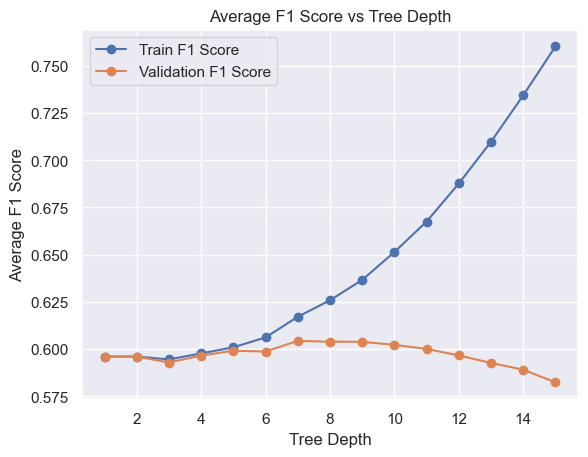

In [ ]:
# ------- FIND THE BEST VALUE FOR MAX_DEPTH
depth_range = range(1, 16)
avg_f1_train = []
avg_f1_val = []

# Perform StratifiedKFold cross-validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for depth in depth_range:
    f1_scores_train = []
    f1_scores_val = []

    for train_index, val_index in skf.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index].copy(), X_train.iloc[val_index].copy()
        y_train_fold, y_val_fold = y_train.iloc[train_index].copy(), y_train.iloc[val_index].copy()

        # Create a Decision Tree model with the current depth
        dt_model = DecisionTreeClassifier(max_depth=depth, random_state=42)
        dt_model.fit(X_train_fold, y_train_fold)

        # Predictions on training set
        y_train_pred = dt_model.predict(X_train_fold)
        f1_train = f1_score(y_train_fold, y_train_pred, average='weighted')
        f1_scores_train.append(f1_train)

        # Predictions on validation set
        y_val_pred = dt_model.predict(X_val_fold)
        f1_val = f1_score(y_val_fold, y_val_pred, average='weighted')
        f1_scores_val.append(f1_val)

    avg_f1_train.append(np.mean(f1_scores_train))
    avg_f1_val.append(np.mean(f1_scores_val))

# Find the depth associated with the highest F1 score
best_depth_train = depth_range[np.argmax(avg_f1_train)]
best_depth_val = depth_range[np.argmax(avg_f1_val)]

# Plotting (moved outside the loop)
plt.plot(depth_range, avg_f1_train, label='Train F1 Score', marker='o')
plt.plot(depth_range, avg_f1_val, label='Validation F1 Score', marker='o')
plt.xlabel('Tree Depth')
plt.ylabel('Average F1 Score')
plt.title('Average F1 Score vs Tree Depth')
plt.legend()
plt.show()

# The best max_depth = 4

In [ ]:
# CLASS_WEIGHTS
DTmodel = DecisionTreeClassifier(max_depth = 5, criterion = 'entropy', max_features = None, max_leaf_nodes = 20, min_samples_leaf = 225,
                                 min_samples_split = 386, class_weight = 'balanced', splitter = 'best')
DTmodel.fit(X_train, y_train)

DT_pred_train = DTmodel.predict(X_train)
DT_pred_val = DTmodel.predict(X_val)

# Assess Model's Performance
print(metrics(y_train, DT_pred_train, y_val, DT_pred_val))

print('f1_train:', f1_score(y_train, DT_pred_train, average='weighted').round(2))
print('f1_val:', f1_score(y_val, DT_pred_val, average='weighted').round(2))

___________________________________________________________________________________________________________
                                                TRAIN                                                      
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.24      0.47      0.32      5565
           1       0.52      0.33      0.40     17416
           2       0.72      0.75      0.73     26084

    accuracy                           0.57     49065
   macro avg       0.49      0.52      0.48     49065
weighted avg       0.59      0.57      0.57     49065

[[ 2620  1451  1494]
 [ 5644  5777  5995]
 [ 2723  3917 19444]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------

In [ ]:
# Calculate the average f1_score with KFOLD (K = 5)
df_dt = pd.DataFrame(columns = ['Train','Validation'], index = ['class_weight=balanced'])
show_results(df_dt, X_train, y_train, DTmodel)

,Train,Validation
class_weight=balanced,0.569+/-0.0,0.539+/-0.0


In [ ]:
# SMOTE
DTmodel = DecisionTreeClassifier(max_depth=5, criterion='entropy', max_features=None, max_leaf_nodes=20, min_samples_leaf=225, min_samples_split=386, splitter='best')
DTmodel.fit(X_smote, y_smote)

DT_pred_train = DTmodel.predict(X_smote)
DT_pred_val = DTmodel.predict(X_val)

print(metrics(y_smote, DT_pred_train, y_val, DT_pred_val))

# F1 scores
print('f1_train:', f1_score(y_smote, DT_pred_train, average='weighted').round(2))
print('f1_val:', f1_score(y_val, DT_pred_val, average='weighted').round(2))

___________________________________________________________________________________________________________
                                                TRAIN                                                      
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.68      0.67     25997
           1       0.53      0.25      0.34     24470
           2       0.60      0.91      0.73     24451

    accuracy                           0.61     74918
   macro avg       0.60      0.61      0.58     74918
weighted avg       0.60      0.61      0.58     74918

[[17663  3544  4790]
 [ 8538  6102  9830]
 [  297  1895 22259]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------

In [ ]:
# Calculate the average f1_score with KFOLD (K = 5)
df_dt = pd.DataFrame(columns = ['Train','Validation'], index = ['smote'])
show_results(df_dt, X_smote, y_smote, DTmodel)

,Train,Validation
smote,0.581+/-0.0,0.522+/-0.0


## 4.6. **Random Forest** <a class="anchor" id="section4.5">

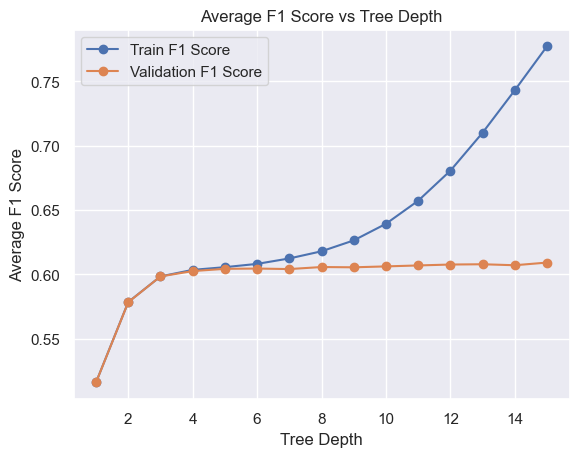

The best max_depth = 15


In [ ]:
# ------- FIND THE BEST VALUE FOR MAX_DEPTH
depth_range = range(1, 16)
avg_f1_train = []
avg_f1_val = []

# Perform StratifiedKFold cross-validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for depth in depth_range:
    f1_scores_train = []
    f1_scores_val = []

    for train_index, val_index in skf.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_val.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_val.iloc[val_index]

        # Create a Decision Tree model with the current depth
        rf_model = RandomForestClassifier(max_depth=depth, random_state=42)
        rf_model.fit(X_train_fold, y_train_fold)

        # Predictions on training set
        y_train_pred = rf_model.predict(X_train_fold)
        f1_train = f1_score(y_train_fold, y_train_pred, average='weighted')
        f1_scores_train.append(f1_train)

        # Predictions on validation set
        y_val_pred = rf_model.predict(X_val_fold)
        f1_val = f1_score(y_val_fold, y_val_pred, average='weighted')
        f1_scores_val.append(f1_val)

    avg_f1_train.append(np.mean(f1_scores_train))
    avg_f1_val.append(np.mean(f1_scores_val))

# Find the depth associated with the highest F1 score
best_depth_train = depth_range[np.argmax(avg_f1_train)]
best_depth_val = depth_range[np.argmax(avg_f1_val)]

# Plotting
plt.plot(depth_range, avg_f1_train, label='Train F1 Score', marker='o')
plt.plot(depth_range, avg_f1_val, label='Validation F1 Score', marker='o')
plt.xlabel('Tree Depth')
plt.ylabel('Average F1 Score')
plt.title('Average F1 Score vs Tree Depth')
plt.legend()
plt.show()

# The best max_depth = best_depth_train
print("The best max_depth =", best_depth_train)

# The best depth = 4/5/6

In [ ]:
# CLASS WEIGHTS
RFmodel = RandomForestClassifier(class_weight='balanced', criterion= 'entropy', max_depth=6, max_features=15,
                                 max_leaf_nodes= None, min_samples_leaf=112)
RFmodel.fit(X_train, y_train)

RF_pred_train = RFmodel.predict(X_train)
RF_pred_val = RFmodel.predict(X_val)

# Assess Model's Performance
metrics(y_train, RF_pred_train, y_val, RF_pred_val)

print('f1_train:', f1_score(y_train, RF_pred_train, average='weighted').round(2))
print('f1_val:', f1_score(y_val, RF_pred_val, average='weighted').round(2))

___________________________________________________________________________________________________________
                                                TRAIN                                                      
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.26      0.47      0.34      5565
           1       0.56      0.33      0.41     17416
           2       0.72      0.79      0.75     26084

    accuracy                           0.59     49065
   macro avg       0.51      0.53      0.50     49065
weighted avg       0.61      0.59      0.58     49065

[[ 2640  1319  1606]
 [ 5153  5678  6585]
 [ 2325  3126 20633]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------

In [ ]:
# Calculate the average f1_score with KFOLD (K = 5)
df_rf = pd.DataFrame(columns = ['Train','Validation'], index = ['class_weight=balanced'])
show_results(df_rf, X_train, y_train, RFmodel)

,Train,Validation
class_weight=balanced,0.582+/-0.0,0.548+/-0.0


In [ ]:
# SMOTE
RFmodel = RandomForestClassifier(criterion= 'entropy', max_depth=6, max_features=15, max_leaf_nodes= None, min_samples_leaf=112)
RFmodel.fit(X_smote, y_smote)

RF_pred_train = RFmodel.predict(X_smote)
RF_pred_val = RFmodel.predict(X_val)

# Assess Model's Performance
metrics(y_smote, RF_pred_train, y_val, RF_pred_val)

print('f1_train:', f1_score(y_smote, RF_pred_train, average='weighted').round(2))
print('f1_val:', f1_score(y_val, RF_pred_val, average='weighted').round(2))

___________________________________________________________________________________________________________
                                                TRAIN                                                      
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.70      0.68     25997
           1       0.52      0.29      0.37     24470
           2       0.63      0.88      0.73     24451

    accuracy                           0.62     74918
   macro avg       0.61      0.62      0.60     74918
weighted avg       0.61      0.62      0.60     74918

[[18109  4037  3851]
 [ 8569  7024  8877]
 [  297  2558 21596]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------

In [ ]:
# Calculate the average f1_score with KFOLD (K = 5)
df_rf = pd.DataFrame(columns = ['Train','Validation'], index = ['smote'])
show_results(df_rf, X_smote, y_smote, RFmodel)

,Train,Validation
smote,0.597+/-0.0,0.549+/-0.0


## 4.7. **SVC** <a class="anchor" id="section4.7">



In [ ]:
SVMmodel = SVC(kernel = 'linear', gamma = 'scale', class_weight = 'balanced')
SVMmodel.fit(X_train, y_train)

SVM_pred_train = SVMmodel.predict(X_train)
SVM_pred_val = SVMmodel.predict(X_val)

# Assess Model's Performance
metrics(y_train, SVM_pred_train, y_val, SVM_pred_val)

print('f1_train:',f1_score(y_train, SVM_pred_train, average='weighted').round(3))
print('f1_val:',f1_score(y_val, SVM_pred_val, average='weighted').round(3))

___________________________________________________________________________________________________________
                                                TRAIN                                                      
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.27      0.23      0.25      5565
           1       0.59      0.37      0.46     17416
           2       0.68      0.87      0.76     26084

    accuracy                           0.62     49065
   macro avg       0.51      0.49      0.49     49065
weighted avg       0.60      0.62      0.60     49065

[[ 1287  2029  2249]
 [ 2465  6498  8453]
 [ 1079  2419 22586]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------

In [ ]:
# Calculate the average f1_score with KFOLD (K = 5)
df_svc = pd.DataFrame(columns = ['Train','Validation'], index = ['class_weight = balanced'])
show_results(df_svc, X_train, y_train, SVMmodel)

,Train,Validation
class_weight = balanced,0.595+/-0.0,0.531+/-0.0


In [ ]:
SVMmodel = SVC(kernel = 'linear', gamma= 'scale')
SVMmodel.fit(X_smote, y_smote)

SVM_pred_train = SVMmodel.predict(X_smote)
SVM_pred_val = SVMmodel.predict(X_val)

# Assess Model's Performance
metrics(y_smote, SVM_pred_train, y_val, SVM_pred_val)

print('f1_train:',f1_score(y_smote, SVM_pred_train, average='weighted').round(3))
print('f1_val:',f1_score(y_val, SVM_pred_val, average='weighted').round(3))

___________________________________________________________________________________________________________
                                                TRAIN                                                      
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.58      0.26      0.36     25997
           1       0.43      0.37      0.40     24470
           2       0.50      0.87      0.64     24451

    accuracy                           0.50     74918
   macro avg       0.50      0.50      0.47     74918
weighted avg       0.51      0.50      0.46     74918

[[ 6777  9764  9456]
 [ 3876  9131 11463]
 [ 1115  2137 21199]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------

In [ ]:
# Calculate the average f1_score with KFOLD (K = 5)
df_svc = pd.DataFrame(columns = ['Train','Validation'], index = ['smote'])
show_results(df_svc, X_smote, y_smote, SVMmodel)

,Train,Validation
smote,0.463+/-0.0,0.53+/-0.0


## 4.8. **Gradient Boosting** <a class="anchor" id="section4.8">

In [ ]:
GBmodel = GradientBoostingClassifier(learning_rate= 0.2, max_depth= 6, min_samples_leaf =2, min_samples_split= 4, n_estimators= 83, subsample=1.0)
GBmodel.fit(X_smote, y_smote)

GB_pred_train = GBmodel.predict(X_smote)
GB_pred_val = GBmodel.predict(X_val)

# Assess Model's Performance
metrics(y_smote, GB_pred_train, y_val, GB_pred_val)

print('f1_train:', f1_score(y_smote, GB_pred_train, average='weighted').round(2))
print('f1_val:', f1_score(y_val, GB_pred_val, average='weighted').round(2))

___________________________________________________________________________________________________________
                                                TRAIN                                                      
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.79      0.79     25997
           1       0.70      0.52      0.59     24470
           2       0.72      0.90      0.80     24451

    accuracy                           0.74     74918
   macro avg       0.74      0.74      0.73     74918
weighted avg       0.74      0.74      0.73     74918

[[20586  3255  2156]
 [ 5314 12632  6524]
 [   83  2267 22101]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------

In [ ]:
# Calculate the average f1_score with KFOLD (K = 5)
df_gb = pd.DataFrame(columns = ['Train','Validation'], index = ['smote'])
show_results(df_gb, X_smote, y_smote, GBmodel)

,Train,Validation
smote,0.729+/-0.0,0.558+/-0.0




# 5. **Test** <a class="anchor" id="section5">

In [ ]:
test = pd.read_csv('test.csv')

In [ ]:
test_copy = test.copy()

In [ ]:
# Set the index to encounter_id
test_copy.set_index('encounter_id', inplace = True)
test_copy_index = test_copy.index

In [ ]:
test_copy.drop(["weight"], axis = 1, inplace=True)

In [ ]:
# If the primary_diagnosis, secondary_diagnosis, or additional_diagnosis repeat then we replace the secondary or additional to 'No Diagnosis'
test_copy.loc[(test_copy['primary_diagnosis'] == test_copy['secondary_diagnosis']), ['secondary_diagnosis']] = 'No Diagnosis'
test_copy.loc[(test_copy['primary_diagnosis'] == test_copy['additional_diagnosis']), ['additional_diagnosis']] = 'No Diagnosis'
test_copy.loc[(test_copy['secondary_diagnosis'] == test_copy['additional_diagnosis']), ['additional_diagnosis']] = 'No Diagnosis'

In [ ]:
# -------- Missing Values
test_copy = test_copy.replace(["?", "Unknown/Invalid", "Not Available", "Not Mapped", " " , '[]' ],np.nan)

In [ ]:
# Replace empty brakets ('[]') with no medication, since a patient can have no medication
test_copy['medication'].replace('[]', 'No Medication', inplace = True)

# The missing values in 'glucose_test_result' and 'a1c_test_result' are due to patients not taking these tests.
# Hence, we imputed them with the label 'Not Taken'.
test_copy["glucose_test_result"].replace(np.nan, "Not Taken", inplace = True)
test_copy["a1c_test_result"].replace(np.nan, "Not Taken",  inplace = True)

# The non-code values in 'payer_code' ("?") are due to people that don´t have insurance
# Hence, we imputed them with the label 'Not Insurance'.
test_copy["payer_code"].replace("?", "No Insurance", inplace = True)

# Remove the initial space in the categories of admission_source
test_copy['admission_source'] = test_copy['admission_source'].str.lstrip()

# secondary and additional diagnosis as 'Not Taken'
test_copy['secondary_diagnosis'].replace(np.nan, "No Diagnosis", inplace = True)
test_copy['additional_diagnosis'].replace(np.nan, "No Diagnosis", inplace = True)

In [ ]:
expired_test = test_copy['discharge_disposition'].fillna(' ').str.contains('expired', case = False)

In [ ]:
# -------- Feature Engeneering
# total_visits
test_copy['total_visits_in_previous_year'] = test_copy['outpatient_visits_in_previous_year'] + test_copy['emergency_visits_in_previous_year'] + test_copy['inpatient_visits_in_previous_year']


# diagnosis_categories
test_copy['primary_diagnoses_categories'] = (test_copy['primary_diagnosis'].apply(categorize_icd9))
test_copy['secondary_diagnoses_categories'] = (test_copy['secondary_diagnosis'].apply(categorize_icd9))
test_copy['additional_diagnoses_categories'] = (test_copy['additional_diagnosis'].apply(categorize_icd9))

test_copy['secondary_diagnoses_categories'].replace(np.nan, "No Diagnosis", inplace = True)
test_copy['additional_diagnoses_categories'].replace(np.nan, "No Diagnosis", inplace = True)



# type2
test_copy['type2'] = np.nan
test_copy.loc[ ~test_copy['medication'].astype(str).str.contains('metformin'), 'type2'] = 0
test_copy.loc[ test_copy['medication'].astype(str).str.contains('metformin'), 'type2'] = 1



# diagnosed_diabetes
test_copy['diagnosed_diabetes'] = np.nan

test_copy.loc[test_copy['primary_diagnosis'].astype(str).str.contains('250')
                  | test_copy['secondary_diagnosis'].astype(str).str.contains('250')
                  | test_copy['additional_diagnosis'].astype(str).str.contains('250'), 'diagnosed_diabetes'] = 1

test_copy.loc[~test_copy['primary_diagnosis'].astype(str).str.contains('250')
                  & ~test_copy['secondary_diagnosis'].astype(str).str.contains('250')
                  & ~test_copy['secondary_diagnosis'].astype(str).str.contains('250'), 'diagnosed_diabetes'] = 0


# race
test_copy['race'].replace({'Hispanic': 'Other','Asian': 'Other'}, inplace = True)


# Age
test_copy['age'].replace({'[0-10)': 5, '[10-20)': 15, '[20-30)': 25, '[30-40)': 35, '[40-50)': 45,
                          '[50-60)': 55, '[60-70)': 65, '[70-80)': 75, '[80-90)': 85, '[90-100)': 95}, inplace = True)


# payer_code
test_copy['payer_code'].replace({'MP': 'Other','FR': 'Other','SI': 'Other','CH': 'Other',
                                                   'PO': 'Other','OT': 'Other','WC': 'Other','DM': 'Other',
                                                   'OG': 'Other','CM': 'Other', 'UN': 'Other', 'CP': 'Other', 'MD': 'Other',
                                                   'BC': 'Other', 'SP': 'Other'}, inplace = True)


# admitted_urgent/emergency
test_copy['admitted_urgent/emergency'] = np.nan
test_copy.loc[(test_copy['admission_type'] == 'Emergency') | (test_copy['admission_type'] == 'Urgent'), 'admitted_urgent/emergency'] = 1
test_copy.loc[(test_copy['admission_type'] != 'Emergency') & (test_copy['admission_type'] != 'Urgent'), 'admitted_urgent/emergency'] = 0


# medical_speciality
test_copy['medical_specialty'].replace({'Surgery-Cardiovascular/Thoracic': 'Surgery', 'Surgery-General': 'Surgery',
                                      'SurgicalSpecialty': 'Surgery', 'Surgery-Vascular': 'Surgery',
                                      'Surgery-Cardiovascular': 'Surgery', 'Surgery-Thoracic': 'Surgery',
                                      'Surgery-Maxillofacial': 'Surgery',  'Surgery-Plastic': 'Surgery',
                                      'Surgeon': 'Surgery', 'Surgery-Pediatric': 'Surgery', 'Surgery-Neuro': 'Surgery',
                                      'Surgery-Colon&Rectal': 'Surgery'}, inplace = True)

test_copy['medical_specialty'].replace({'Pediatrics-CriticalCare': 'Pediatrics', 'Pediatrics-Hematology-Oncology': 'Pediatrics',
                                      'Anesthesiology-Pediatric': 'Pediatrics', 'Pediatrics-Endocrinology': 'Pediatrics',
                                      'Pediatrics-Pulmonology': 'Pediatrics', 'Pediatrics-Neurology': 'Pediatrics', 'Cardiology-Pediatric': 'Pediatrics',
                                      'Pediatrics-InfectiousDiseases': 'Pediatrics', 'Pediatrics-EmergencyMedicine': 'Pediatrics',
                                      'Pediatrics-AllergyandImmunology': 'Pediatrics'}, inplace = True)

test_copy['medical_specialty'].replace({'Psychiatry-Child/Adolescent': 'Psychiatry'}, inplace = True)

test_copy['medical_specialty'].replace({'ObstetricsandGynecology': "Women's Health", 'Gynecology': "Women's Health",
                                      'Obsterics&Gynecology-GynecologicOnco': "Women's Health",
                                      'Obstetrics': "Women's Health"}, inplace = True)


# discharge_disposition
test_copy['discharge_disposition'].replace({
            "Discharged/transferred to SNF": "Within Facility Transfer",
            'Discharged/transferred/referred to this institution for outpatient services': "Within Facility Transfer",
            "Discharged/transferred to ICF": "Within Facility Transfer",
            "Discharged/transferred within this institution to Medicare approved swing bed": "Within Facility Transfer",
            'Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital': "Within Facility Transfer"}, inplace = True)

test_copy['discharge_disposition'].replace({
            "Discharged/transferred to another short term hospital": "Another Facility Transfer",
            "Discharged/transferred to another rehab fac including rehab units of a hospital .": "Another Facility Transfer",
            "Discharged/transferred/referred another institution for outpatient services": "Another Facility Transfer",
            "Discharged/transferred to a long term care hospital.": "Another Facility Transfer",
            'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.': 'Another Facility Transfer',
            "Discharged/transferred to a federal health care facility.": "Another Facility Transfer",
            'Discharged/transferred to another type of inpatient care institution': 'Another Facility Transfer',
            'Hospice / medical facility': 'Another Facility Transfer'}, inplace = True)

test_copy['discharge_disposition'].replace({'Discharged to home': 'Home Discharge',
                 'Discharged/transferred to home with home health service': 'Home Discharge',
                 'Discharged/transferred to home under care of Home IV provider': 'Home Discharge',
                 'Hospice / home': 'Home Discharge'}, inplace = True)

test_copy['discharge_disposition'].replace({'Admitted as an inpatient to this hospital': 'Other',
                 'Left AMA': 'Other',
                 'Neonate discharged to another hospital for neonatal aftercare': 'Other'}, inplace = True)


# admission_source
test_copy['admission_source'].replace({'Physician Referral': 'Referral', 'Transfer from a hospital': 'Transfer',
                                'Transfer from another health care facility': 'Transfer',
                                'Clinic Referral': 'Referral', 'Transfer from a Skilled Nursing Facility (SNF)': 'Transfer',
                                 'Transfer from hospital inpt/same fac reslt in a sep claim': 'Transfer',
                                 'HMO Referral': 'Referral', 'Court/Law Enforcement': 'Other',
                                 'Transfer from Ambulatory Surgery Center': 'Transfer',
                                 'Transfer from critial access hospital': 'Transfer',
                                 'Extramural Birth': 'Other', 'Normal Delivery': 'Other', 'Sick Baby': 'Other', 'Not Available': 'Not Mapped'}, inplace = True)

# nr_of_encounters
test_copy['encounter_count'] = test_copy.groupby('patient_id')['patient_id'].transform('count')

# Log/Sqrt Transformations
test_copy['length_of_stay_in_hospital'] = np.log(test_copy['length_of_stay_in_hospital'])

test_copy['number_of_medications'] = np.sqrt(test_copy['number_of_medications'])

test_copy['outpatient_visits_in_previous_year'] = np.sqrt(test_copy['outpatient_visits_in_previous_year'])

test_copy['inpatient_visits_in_previous_year'] = np.sqrt(test_copy['inpatient_visits_in_previous_year'])

test_copy['emergency_visits_in_previous_year'] = np.sqrt(test_copy['emergency_visits_in_previous_year'])

test_copy['non_lab_procedures'] = np.sqrt(test_copy['non_lab_procedures'])

test_copy['number_diagnoses'] = np.log(test_copy['number_diagnoses'])


# change_in_meds_during_hospitalization
test_copy['change_in_meds_during_hospitalization'].replace({'No': 0,'Ch': 1}, inplace = True)


# prescribed_diabetes_meds
test_copy['prescribed_diabetes_meds'].replace({'No': 0,'Yes': 1}, inplace = True)

# Female
test_copy['Female'] = test_copy['gender'].replace({'Female': 1,'Male': 0})
test_copy.drop(["gender"], axis = 1, inplace=True)

In [ ]:
test_copy.drop(['patient_id', 'primary_diagnosis', 'secondary_diagnosis', 'additional_diagnosis'], axis = 1, inplace = True)

In [ ]:
all_features_wout_binary.remove('country')
all_features_wout_binary.remove('weight')

In [ ]:
X_train_unscalled.drop(['weight'], axis = 1, inplace = True)

In [ ]:
# Target Enconder
for column in non_metric_features + ['country']:
    encoder.fit(X_train_unscalled[[column]], y_train)

    X_train_unscalled[column] = encoder.transform(X_train_unscalled[[column]])
    test_copy[column] = encoder.transform(test_copy[[column]])

In [ ]:
# MinMax Scaller
for column in all_features_wout_binary:
    scaler.fit(X_train_unscalled[[column]])
    test_copy[column] = scaler.transform(test_copy[[column]])

In [ ]:
# Fill Missing Values
test_copy = pd.DataFrame(knn_imputer.transform(test_copy), columns = test_copy.columns)

In [ ]:
test_copy = pd.DataFrame(test_copy, columns = X_smote.columns)

In [ ]:
# ------------- Prediction
final = RandomForestClassifier(class_weight = 'balanced', criterion = 'entropy', max_depth = 6, max_features = 15,
                               max_leaf_nodes = None, min_samples_leaf = 112).fit(X_train, y_train)
predictions = final.predict(test_copy)
predictions

array([2, 1, 2, ..., 2, 2, 2])

In [ ]:
test_copy.index = test_copy_index

In [ ]:
# Set target to 0 for patients that were discharge as 'Expired'
for row in range(len(test_copy)):
    if expired_test.iloc[row] == True:
        predictions[row] = 0

In [ ]:
index = test_copy.index.T
answer = pd.DataFrame([index, predictions]).T
answer.columns = ['encounter_id','readmitted_multiclass']
answer

,encounter_id,readmitted_multiclass
0,499502,2
1,447319,1
2,309126,2
3,181183,2
4,359339,2
...,...,...
30525,451150,2
30526,549298,0
30527,327586,2
30528,351214,2


In [ ]:
# Replace Values
answer['readmitted_multiclass'].replace({2: 'No', 0: '<30 days', 1: '>30 days' }, inplace = True)

In [ ]:
# Export of the answers dataframe
answer.to_csv(r'Group_12_RandomForestModel_Multiclass.csv', index = None)